In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd ./drive/MyDrive/yolov7

Mounted at /content/drive
/content/drive/MyDrive/yolov7


In [ ]:
pwd

'/content/drive/My Drive/yolov7/Experiment'

In [ ]:
%cd yolov7

/content/drive/MyDrive/yolov7


In [ ]:
import pandas as pd
import os

file_paths = [
    'Experiment/data/feature/new_feature/features_with_labels_prerna.csv',
    'Experiment/data/feature/new_feature/features_with_labels_umang.csv',
    'Experiment/data/feature/new_feature/features_with_labels_yutaro.csv',
    'Experiment/data/feature/new_feature/features_with_labels_aoi.csv',
    'Experiment/data/feature/new_feature/features_with_labels_nabe.csv'
]

for input_file in file_paths:
    try:
        # ファイルが存在するか確認
        if not os.path.exists(input_file):
            print(f"File not found: {input_file}")
            continue

        # データを読み込み
        print(f"Processing file: {input_file}")
        data = pd.read_csv(input_file)

        # NaNを削除
        data = data.dropna(subset=['action'])  # 'action'列のNaNを削除

        # 同じファイル名で上書き保存
        data.to_csv(input_file, index=False)
        print(f"Successfully cleaned and saved: {input_file}")
    except Exception as e:
        print(f"An error occurred while processing {input_file}: {e}")


Processing file: Experiment/data/feature/new_feature/features_with_labels_prerna.csv
Successfully cleaned and saved: Experiment/data/feature/new_feature/features_with_labels_prerna.csv
Processing file: Experiment/data/feature/new_feature/features_with_labels_umang.csv
Successfully cleaned and saved: Experiment/data/feature/new_feature/features_with_labels_umang.csv
Processing file: Experiment/data/feature/new_feature/features_with_labels_yutaro.csv
Successfully cleaned and saved: Experiment/data/feature/new_feature/features_with_labels_yutaro.csv
Processing file: Experiment/data/feature/new_feature/features_with_labels_aoi.csv
Successfully cleaned and saved: Experiment/data/feature/new_feature/features_with_labels_aoi.csv
Processing file: Experiment/data/feature/new_feature/features_with_labels_nabe.csv
Successfully cleaned and saved: Experiment/data/feature/new_feature/features_with_labels_nabe.csv


In [ ]:
import pandas as pd

# 入力ファイルと出力ファイルのパス
input_file = 'Experiment/data/feature/new_feature/features_with_labels_yutaro.csv'  # 編集対象のCSVファイル
output_file = 'Experiment/data/feature/new_feature/features_with_labels_yutaro.csv'  # 編集後のCSVファイル

# データを読み込み
data = pd.read_csv(input_file)

# 'action' 列の 'throwing' を 'throwing things' に置き換え
data['action'] = data['action'].replace('Throwing', 'Throwing things')

# 確認
print(f"Updated actions: {data['action'].unique()}")

# 編集後のデータを保存
data.to_csv(output_file, index=False)
print(f"Updated file saved as {output_file}")


Updated actions: ['Throwing things' 'Biting' 'Eating snacks' 'Walking' 'Using phone'
 'Attacking' 'Head banging' 'Sitting quietly']
Updated file saved as Experiment/data/feature/new_feature/features_with_labels_yutaro.csv


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6534 - loss: 1.0365
Epoch 2/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9954 - loss: 0.0437
Epoch 3/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9999 - loss: 0.0071
Epoch 4/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 5/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0012
Epoch 6/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 6.4778e-04
Epoch 7/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 4.1085e-04
Epoch 8/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 2.5146e-04
Epoch 9/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 1.8287e-04
Epoch 10/20
459/459 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 1.3998e-04
Epoch 11/20
459/459 ━━━━━━━━━━━━━━━━━━━━

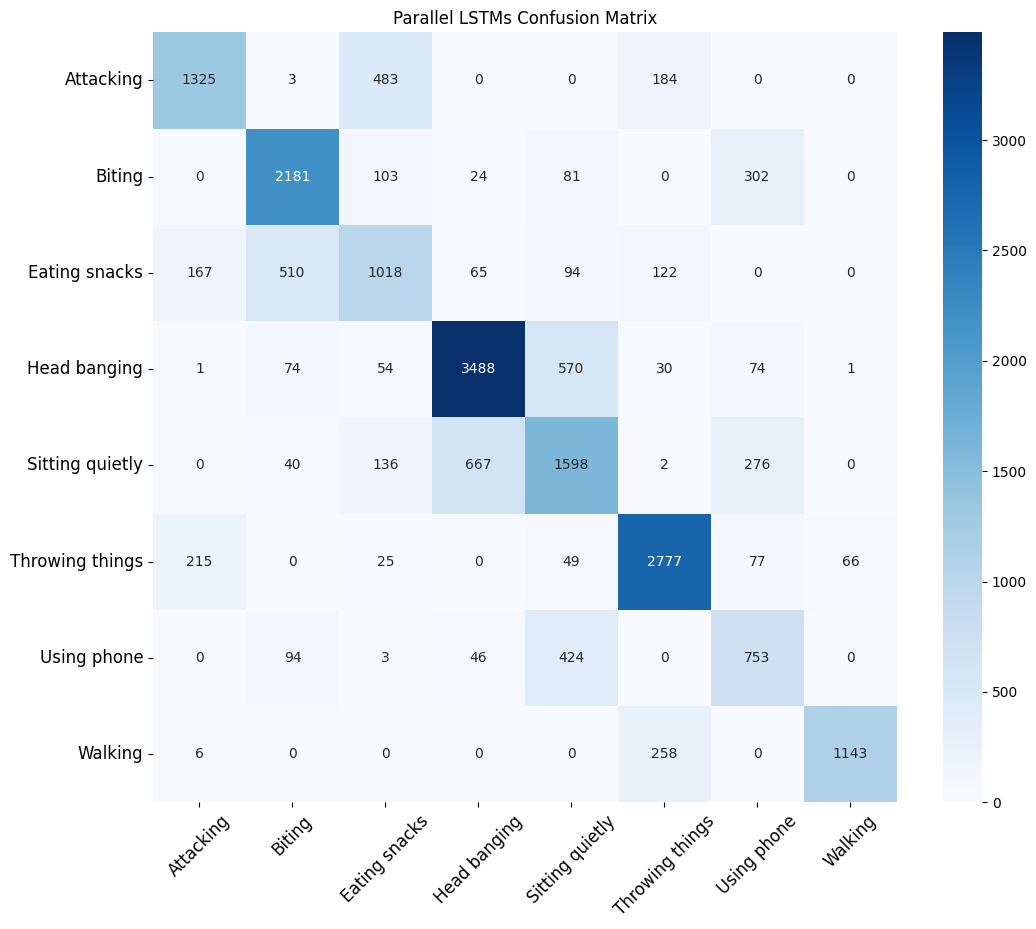

Final confusion matrix saved to: result/all/ParallelLSTMs.png


In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input, Concatenate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ランダムシードを固定
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)

# データのファイルパス
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# タイムステップ設定（マルチLSTM用）
time_steps_1 = 30  # 短時間の異常行動
time_steps_2 = 90  # 長時間の正常行動

# 混同行列の累積用
total_conf_matrix = None
total_y_true = []
total_y_pred = []

# 結果保存用ディレクトリ
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを作成し、異なる行動が混ざらないようにする
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わったらバッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファが time_steps に達したらシーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # スライディングウィンドウ方式

    return np.array(sequences), np.array(labels)

# 全データを統合し、ラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_train に合わせて y_train をフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換（2種類の time_steps）
    X_train_seq_1, y_train_seq_1 = create_sequences_by_action(pd.DataFrame(X_train), pd.Series(y_train), time_steps_1)
    X_train_seq_2, y_train_seq_2 = create_sequences_by_action(pd.DataFrame(X_train), pd.Series(y_train), time_steps_2)

    # テストデータをシーケンスに変換（2種類の time_steps）
    X_test_seq_1, y_test_seq_1 = create_sequences_by_action(pd.DataFrame(X_test), pd.Series(y_test), time_steps_1)
    X_test_seq_2, y_test_seq_2 = create_sequences_by_action(pd.DataFrame(X_test), pd.Series(y_test), time_steps_2)

    # サンプル数を統一（ミニマムの数に揃える）
    min_samples = min(len(X_train_seq_1), len(X_train_seq_2))
    X_train_seq_1 = X_train_seq_1[:min_samples]
    X_train_seq_2 = X_train_seq_2[:min_samples]
    y_train_seq = y_train_seq_2[:min_samples]  # `y_train_seq_2` に合わせる

    min_test_samples = min(len(X_test_seq_1), len(X_test_seq_2))
    X_test_seq_1 = X_test_seq_1[:min_test_samples]
    X_test_seq_2 = X_test_seq_2[:min_test_samples]
    y_test_seq = y_test_seq_2[:min_test_samples]  # `y_test_seq_2` に合わせる

    # マルチヘッドLSTMモデルの構築
    input_1 = Input(shape=(time_steps_1, X_train_seq_1.shape[2]))
    lstm_1 = LSTM(64)(input_1)

    input_2 = Input(shape=(time_steps_2, X_train_seq_2.shape[2]))
    lstm_2 = LSTM(64)(input_2)

    merged = Concatenate()([lstm_1, lstm_2])  # 2つのLSTMの出力を統合
    dense = Dense(32, activation='relu')(merged)
    output = Dense(len(label_encoder.classes_), activation='softmax')(dense)

    model = Model(inputs=[input_1, input_2], outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルをトレーニング
    model.fit([X_train_seq_1, X_train_seq_2], y_train_seq, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict([X_test_seq_1, X_test_seq_2]), axis=1)

    # F1スコアの計算用にリストに追加
    total_y_true.extend(y_test_seq)
    total_y_pred.extend(y_test_pred_sequences)

    # 混同行列の累積
    conf_matrix = confusion_matrix(y_test_seq, y_test_pred_sequences)
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 全体のスコアを計算
final_accuracy = accuracy_score(total_y_true, total_y_pred)
final_precision = precision_score(total_y_true, total_y_pred, average='weighted')
final_recall = recall_score(total_y_true, total_y_pred, average='weighted')
final_f1 = f1_score(total_y_true, total_y_pred, average='weighted')

print(f"\nFinal Results:")
print(f'Accuracy: {final_accuracy:.2f}, Precision: {final_precision:.2f}, Recall: {final_recall:.2f}, F1 Score: {final_f1:.2f}')
# 混同行列をヒートマップで表示・保存（カウントベース）
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(total_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title("Parallel LSTMs Confusion Matrix")

# 保存パスを指定して保存
output_path = os.path.join(output_dir, "ParallelLSTMs.png")
plt.savefig(output_path)
plt.show()

print(f"Final confusion matrix saved to: {output_path}")



In [ ]:
pwd

'/content/drive/MyDrive/yolov7'

In [4]:
%cd Experiment

/content/drive/MyDrive/yolov7/Experiment


In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ランダムシードを固定してランダム性をなくす
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# データのファイルパス
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップ設定
time_steps = 110

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを作成し、異なる行動が混ざらないようにする
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わったらバッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファが time_steps に達したらシーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # スライディングウィンドウ方式

    return np.array(sequences), np.array(labels)

# 全データを統合し、ラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_train に合わせて y_train をフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTM モデルを構築
    model = Sequential([
        Input(shape=(time_steps, X_train_sequences.shape[2])),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルをトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をデータフレーム化
conf_matrix_count_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列をヒートマップで可視化
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存（カウントベース）
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_count_df, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title(f"Cross-Validation Confusion Matrix (Counts) (Time Steps={time_steps})")

# 結果を保存
output_path = os.path.join(output_dir, f"new_conf_matrix_count_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with counts saved to: {output_path}")



Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
323/487 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4150 - loss: 1.6714

KeyboardInterrupt: 

Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6830 - loss: 0.9975
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9615 - loss: 0.1248
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9796 - loss: 0.0744
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9876 - loss: 0.0422
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9898 - loss: 0.0319
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9914 - loss: 0.0260
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9902 - loss: 0.0273
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9941 - loss: 0.0186
Epoch 9/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9880 - loss: 0.0311
Epoch 10/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9969 - loss: 0.0136
Epoch 11/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accur

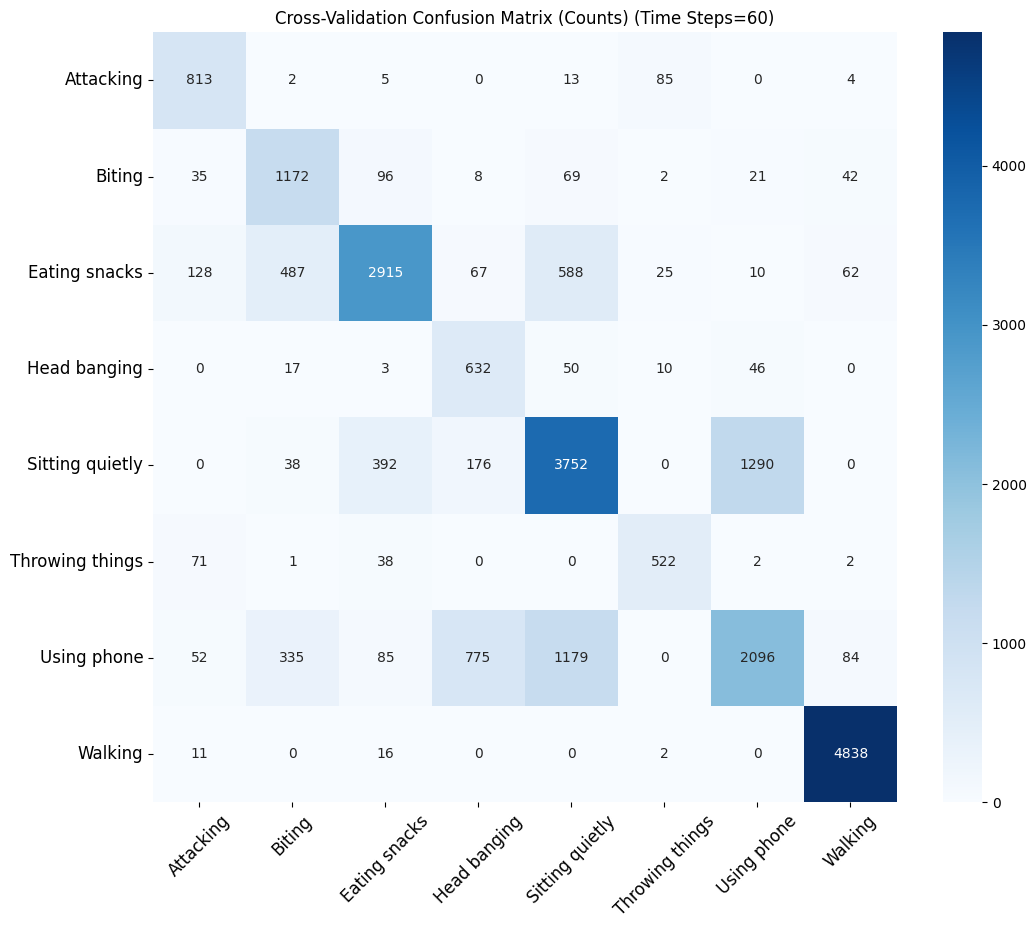

Confusion matrix with counts saved to: result/all/new_conf_matrix_count_timestep_60.png


In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ランダムシードを固定してランダム性をなくす
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# データのファイルパス
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップ設定
time_steps = 60

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを作成し、異なる行動が混ざらないようにする
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わったらバッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファが time_steps に達したらシーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # スライディングウィンドウ方式

    return np.array(sequences), np.array(labels)

# 全データを統合し、ラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_train に合わせて y_train をフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTM モデルを構築
    model = Sequential([
        Input(shape=(time_steps, X_train_sequences.shape[2])),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルをトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をデータフレーム化
conf_matrix_count_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列をヒートマップで可視化
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存（カウントベース）
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_count_df, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title(f"Cross-Validation Confusion Matrix (Counts) (Time Steps={time_steps})")

# 結果を保存
output_path = os.path.join(output_dir, f"new_conf_matrix_count_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with counts saved to: {output_path}")



Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6963 - loss: 0.9191
Epoch 2/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9415 - loss: 0.1732
Epoch 3/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9677 - loss: 0.0988
Epoch 4/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9724 - loss: 0.0781
Epoch 5/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9803 - loss: 0.0566
Epoch 6/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9824 - loss: 0.0544
Epoch 7/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9865 - loss: 0.0382
Epoch 8/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9845 - loss: 0.0399
Epoch 9/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9885 - loss: 0.0353
Epoch 10/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9891 - loss: 0.0317
Epoch 11/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accur

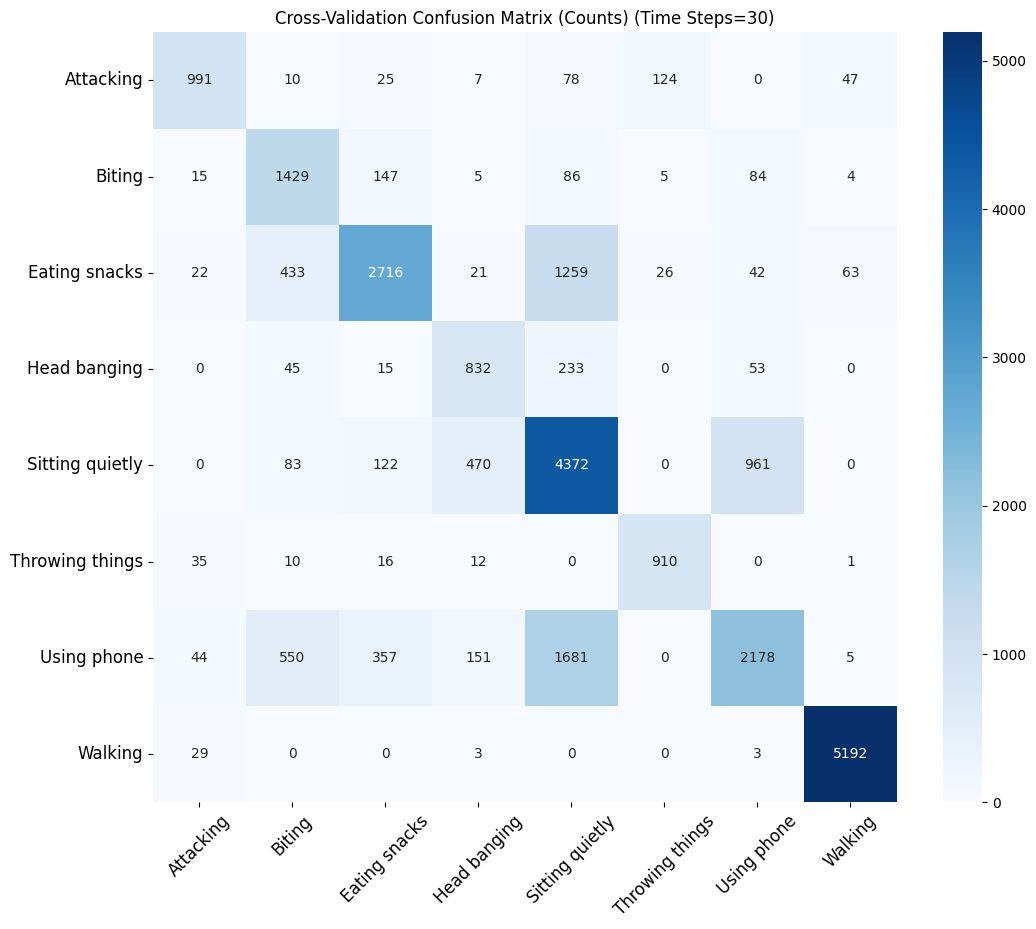

Confusion matrix with counts saved to: result/all/new_conf_matrix_count_timestep_30.png


In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ランダムシードを固定してランダム性をなくす
SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# データのファイルパス
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップ設定
time_steps = 30

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを作成し、異なる行動が混ざらないようにする
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わったらバッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファが time_steps に達したらシーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # スライディングウィンドウ方式

    return np.array(sequences), np.array(labels)

# 全データを統合し、ラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_train に合わせて y_train をフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTM モデルを構築
    model = Sequential([
        Input(shape=(time_steps, X_train_sequences.shape[2])),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルをトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をデータフレーム化
conf_matrix_count_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列をヒートマップで可視化
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)
# 混同行列をヒートマップで表示・保存（カウントベース）
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_count_df, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title(f"Cross-Validation Confusion Matrix (Counts) (Time Steps={time_steps})")

# 結果を保存
output_path = os.path.join(output_dir, f"new_conf_matrix_count_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with counts saved to: {output_path}")



Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6763 - loss: 0.9820
Epoch 2/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9500 - loss: 0.1570
Epoch 3/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9843 - loss: 0.0595
Epoch 4/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9876 - loss: 0.0414
Epoch 5/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9857 - loss: 0.0471
Epoch 6/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9921 - loss: 0.0283
Epoch 7/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9951 - loss: 0.0185
Epoch 8/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9953 - loss: 0.0162
Epoch 9/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9945 - loss: 0.0188
Epoch 10/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9933 - loss: 0.0220
Epoch 11/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accur

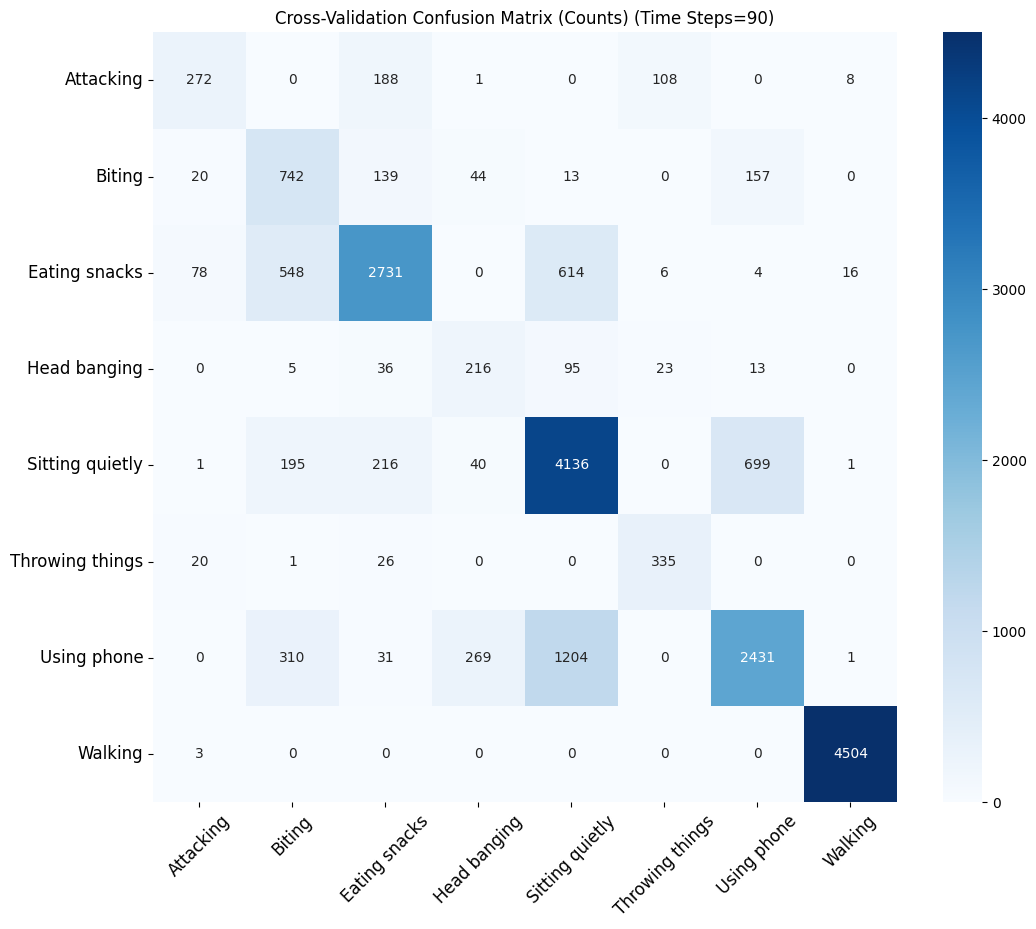

Confusion matrix with counts saved to: result/all/new_conf_matrix_count_timestep_90.png


In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ランダムシードを固定してランダム性をなくす
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.keras.utils.set_random_seed(SEED)
tf.config.experimental.enable_op_determinism()

# データのファイルパス
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップ設定
time_steps = 90

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを作成し、異なる行動が混ざらないようにする
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わったらバッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファが time_steps に達したらシーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # スライディングウィンドウ方式

    return np.array(sequences), np.array(labels)

# 全データを統合し、ラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_train に合わせて y_train をフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTM モデルを構築
    model = Sequential([
        Input(shape=(time_steps, X_train_sequences.shape[2])),
        LSTM(64),
        Dense(32, activation='relu'),
        Dense(len(label_encoder.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルをトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をデータフレーム化
conf_matrix_count_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列をヒートマップで可視化
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)
# 混同行列をヒートマップで表示・保存（カウントベース）
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_count_df, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title(f"Cross-Validation Confusion Matrix (Counts) (Time Steps={time_steps})")

# 結果を保存
output_path = os.path.join(output_dir, f"new_conf_matrix_count_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with counts saved to: {output_path}")



150フレーム


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7049 - loss: 0.8923
Epoch 2/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9745 - loss: 0.0893
Epoch 3/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9908 - loss: 0.0314
Epoch 4/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9923 - loss: 0.0264
Epoch 5/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9939 - loss: 0.0170
Epoch 6/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9958 - loss: 0.0141
Epoch 7/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9954 - loss: 0.0159
Epoch 8/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.0073
Epoch 9/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9993 - loss: 0.0034
Epoch 10/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9968 - loss: 0.0118
Epoch 11/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accur

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6978 - loss: 0.8868
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9663 - loss: 0.1190
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9889 - loss: 0.0388
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9906 - loss: 0.0314
Epoch 5/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9947 - loss: 0.0216
Epoch 6/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9968 - loss: 0.0118
Epoch 7/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9977 - loss: 0.0080
Epoch 8/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9986 - loss: 0.0050
Epoch 9/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9914 - loss: 0.0298
Epoch 10/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9981 - loss: 0.0076
Epoch 11/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9982 - loss: 0.0061
Epoch 12/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6777 - loss: 0.9140
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9415 - loss: 0.1589
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9804 - loss: 0.0600
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9847 - loss: 0.0398
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9885 - loss: 0.0297
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9898 - loss: 0.0265
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9942 - loss: 0.0184
Epoch 8/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9948 - loss: 0.0152
Epoch 9/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9830 - loss: 0.0480
Epoch 10/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9890 - loss: 0.0382
Epoch 11/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9980 - loss: 0.0083
Epoch 12/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


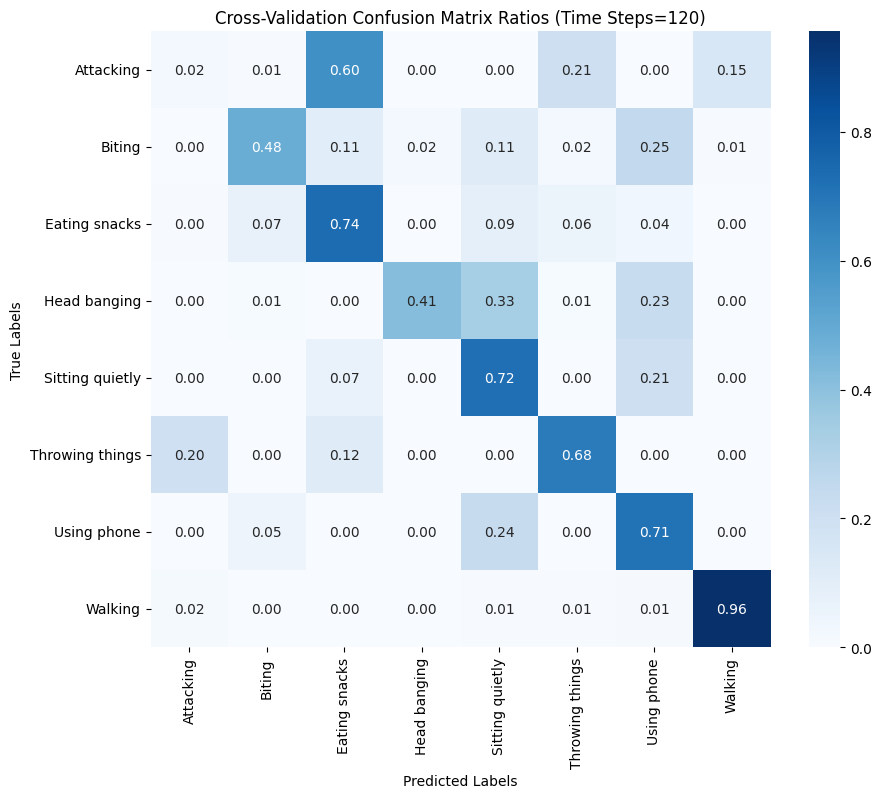

Confusion matrix with ratios saved to: result/all/conf_matrix_ratio_timestep_120.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import tensorflow as tf

# 再現性のためにシードを固定
tf.random.set_seed(42)
np.random.seed(42)

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 120
def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# 全データを統合してラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)  # 形状を固定
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 数値の混同行列をデータフレーム化
conf_matrix_count_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 結果をヒートマップで表示・保存
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)
# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
sns.heatmap(conf_matrix_count_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix Counts (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"new_conf_matrix_count_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with counts saved to: {output_path}")



１２０フレーム

LabelEncoder classes: ['Attacking' 'Biting' 'Eating snacks' 'Head banging' 'Sitting quietly'
 'Throwing things' 'Using phone' 'Walking']
Training label distribution:
Sitting quietly: 6356
Using phone: 5314
Head banging: 1584
Walking: 5575
Eating snacks: 4872
Throwing things: 1332
Attacking: 1630
Biting: 2094

Head banging samples: 1584
Total samples: 28757
Head banging ratio: 5.51%


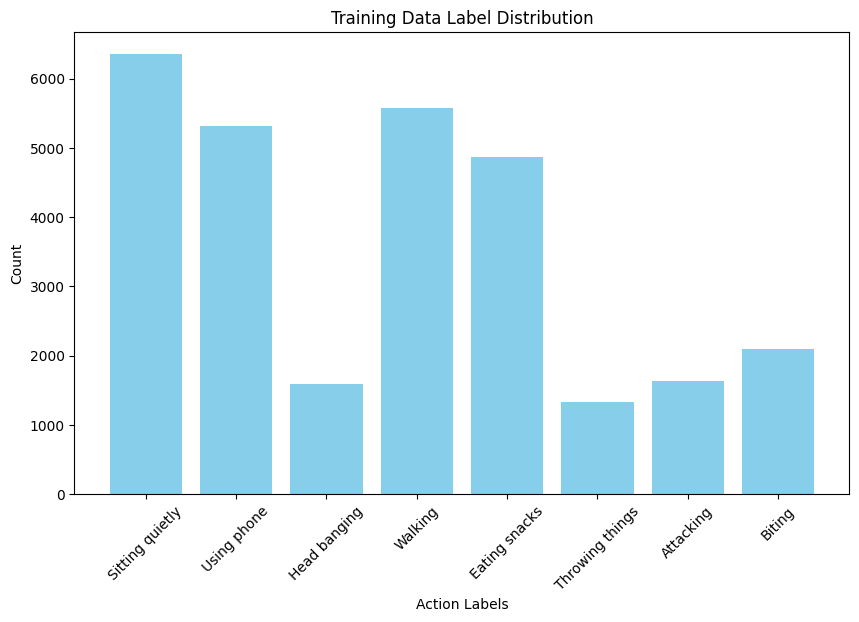

Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6776 - loss: 0.9235
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9628 - loss: 0.1159
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9929 - loss: 0.0325
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9981 - loss: 0.0118
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9948 - loss: 0.0165
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9968 - loss: 0.0115
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9954 - loss: 0.0158
Epoch 8/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9974 - loss: 0.0094
Epoch 9/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9989 - loss: 0.0047
Epoch 10/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9991 - loss: 0.0033
Epoch 11/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accur

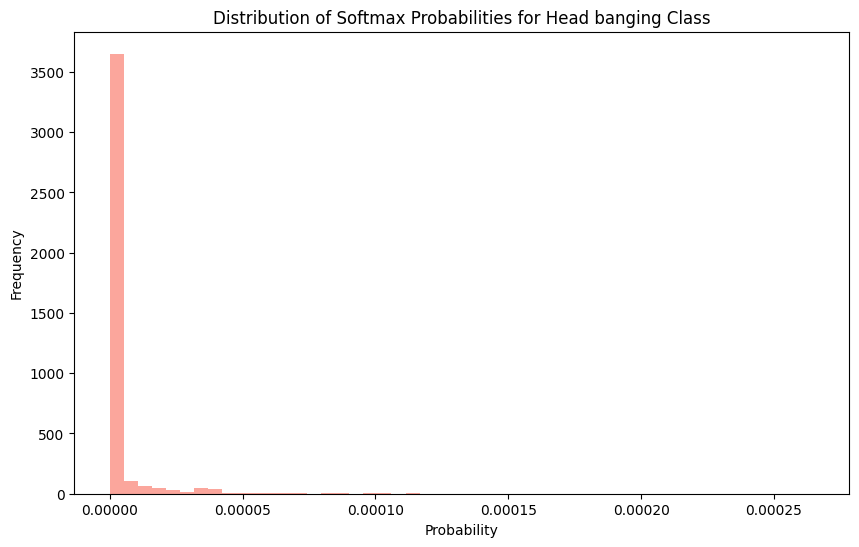

Mean probability for Head banging: 0.0000
Standard deviation: 0.0000
Percentage of predictions with probability < 0.1: 100.00%
Using data/feature/new_feature/features_with_labels_umang.csv as test data...
Epoch 1/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7092 - loss: 0.8748
Epoch 2/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9438 - loss: 0.1795
Epoch 3/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9838 - loss: 0.0554
Epoch 4/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9958 - loss: 0.0199
Epoch 5/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9984 - loss: 0.0087
Epoch 6/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9996 - loss: 0.0035
Epoch 7/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9997 - loss: 0.0024
Epoch 8/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9919 - loss: 0.0283
Epoch 9/20
368/368 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9999 - loss: 0.0025
Epoch 10/20
368/368 ━

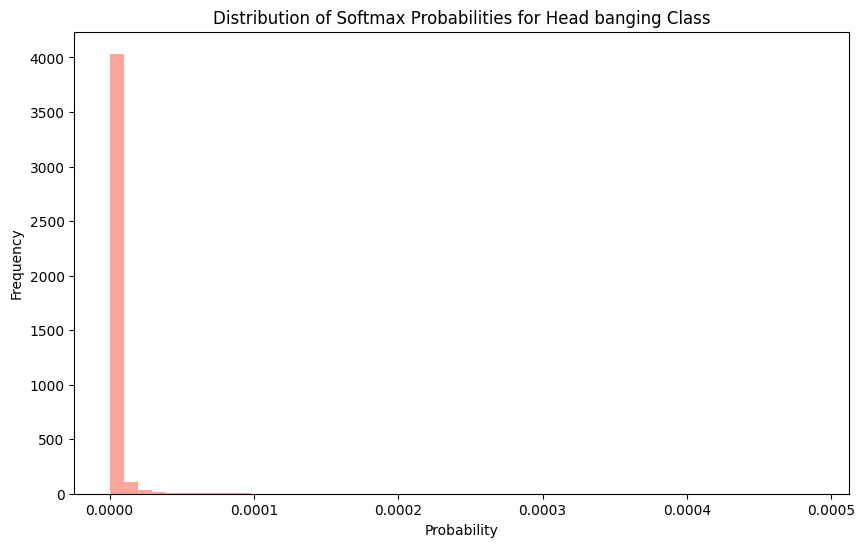

Mean probability for Head banging: 0.0000
Standard deviation: 0.0000
Percentage of predictions with probability < 0.1: 100.00%
Using data/feature/new_feature/features_with_labels_yutaro.csv as test data...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6720 - loss: 0.9466
Epoch 2/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9754 - loss: 0.0815
Epoch 3/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9875 - loss: 0.0428
Epoch 4/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9932 - loss: 0.0254
Epoch 5/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9967 - loss: 0.0136
Epoch 6/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9965 - loss: 0.0134
Epoch 7/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9988 - loss: 0.0073
Epoch 8/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9955 - loss: 0.0178
Epoch 9/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.0071
Epoch 10/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9989 - loss: 0.0057
Epoch 11/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9992 - loss: 0.0027
Epoch 12/20
423/423 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

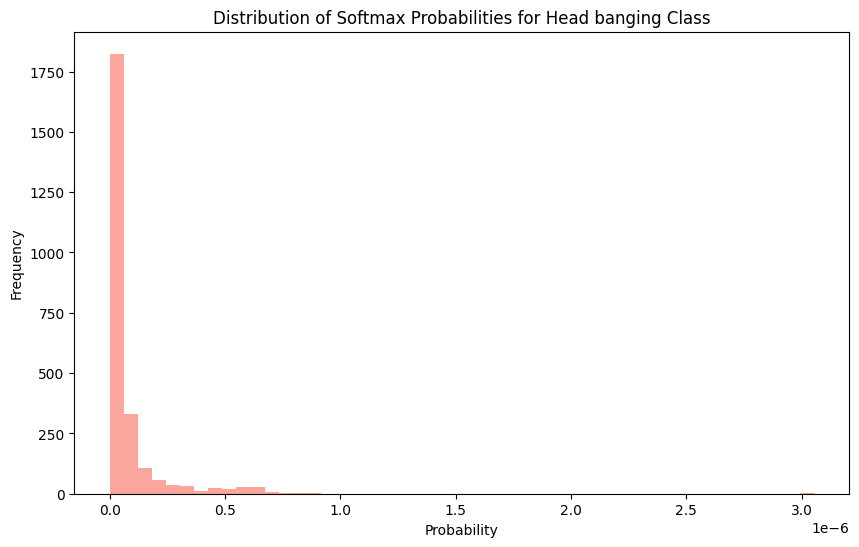

Mean probability for Head banging: 0.0000
Standard deviation: 0.0000
Percentage of predictions with probability < 0.1: 100.00%
Using data/feature/new_feature/features_with_labels_aoi.csv as test data...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7699 - loss: 0.7356
Epoch 2/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9838 - loss: 0.0632
Epoch 3/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9951 - loss: 0.0245
Epoch 4/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9971 - loss: 0.0149
Epoch 5/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9939 - loss: 0.0215
Epoch 6/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9981 - loss: 0.0092
Epoch 7/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9987 - loss: 0.0060
Epoch 8/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9981 - loss: 0.0073
Epoch 9/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9987 - loss: 0.0064
Epoch 10/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9993 - loss: 0.0027
Epoch 11/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9991 - loss: 0.0033
Epoch 12/20
421/421 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

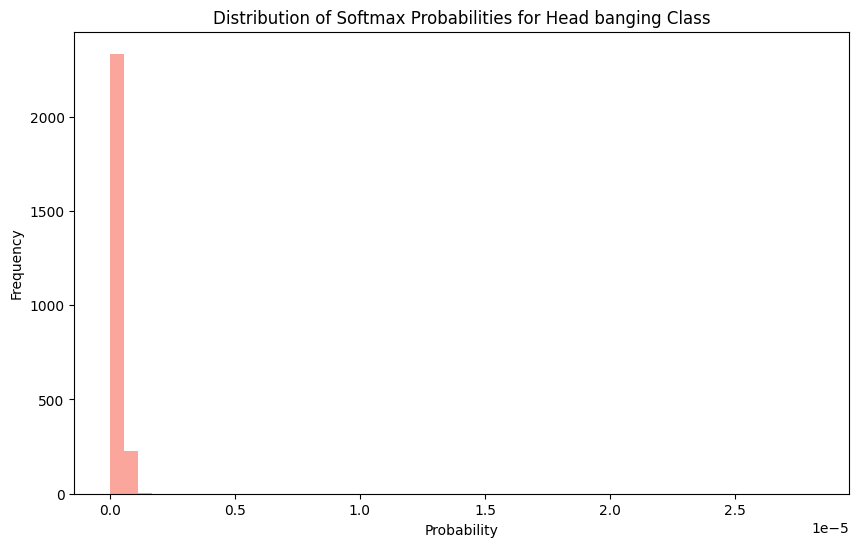

Mean probability for Head banging: 0.0000
Standard deviation: 0.0000
Percentage of predictions with probability < 0.1: 100.00%
Using data/feature/new_feature/features_with_labels_nabe.csv as test data...


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.8779
Epoch 2/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9555 - loss: 0.1605
Epoch 3/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9969 - loss: 0.0272
Epoch 4/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9956 - loss: 0.0205
Epoch 5/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9955 - loss: 0.0172
Epoch 6/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9989 - loss: 0.0054
Epoch 7/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9981 - loss: 0.0069
Epoch 8/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9979 - loss: 0.0093
Epoch 9/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9995 - loss: 0.0037
Epoch 10/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9997 - loss: 0.0020
Epoch 11/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9990 - loss: 0.0034
Epoch 12/20
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

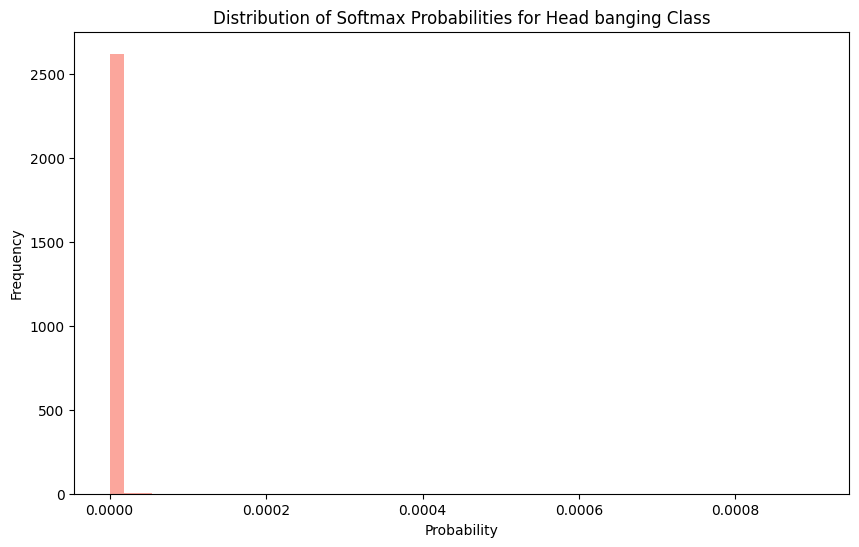

Mean probability for Head banging: 0.0000
Standard deviation: 0.0000
Percentage of predictions with probability < 0.1: 100.00%

Average Test Scores across all folds:
Accuracy: 0.75
Precision: 0.78
Recall: 0.75
F1 Score: 0.75


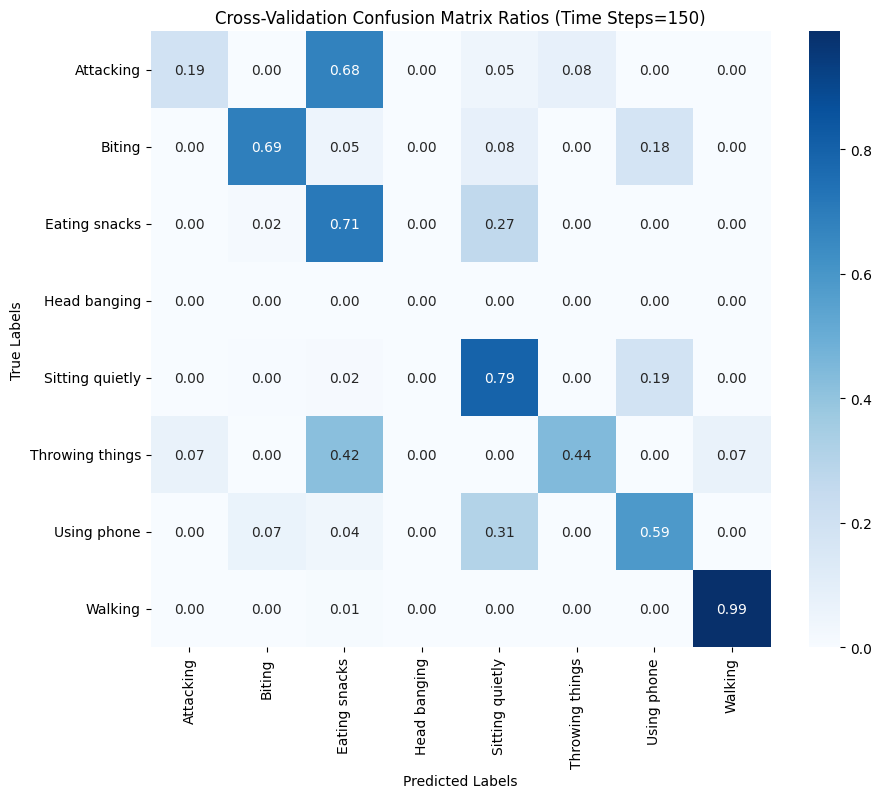

Confusion matrix with ratios saved to: result/all/conf_matrix_ratio_timestep_150.png
Final 'Head banging' count in training data: 1322
Final 'Head banging' count in test data: 262


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from collections import Counter

# 再現性のためにシードを固定
tf.random.set_seed(42)
np.random.seed(42)

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 150
def create_sequences_by_action_debug(X, y, time_steps):
    """
    全てのアクションに対して150フレーム以上連続している場合にシーケンスを生成
    """
    sequences = []
    labels = []
    buffer = []
    last_action = None

    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)

    for i in range(len(X)):
        action = y.iloc[i]

        # バッファに追加
        if action == last_action or last_action is None:
            buffer.append(X.iloc[i].values)
        else:
            buffer = [X.iloc[i].values]

        # 150フレームに達したらシーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(action)
            buffer.pop(0)

        last_action = action

    return np.array(sequences), np.array(labels)

# 全データを統合してラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])
print("LabelEncoder classes:", label_encoder.classes_)

# 学習時のデータ不均衡を確認
print("Training label distribution:")
train_label_counts = Counter(all_data['action'])
for label, count in train_label_counts.items():
    print(f"{label}: {count}")

total_samples = sum(train_label_counts.values())
hb_count = train_label_counts.get('Head banging', 0)
hb_ratio = hb_count / total_samples * 100 if total_samples > 0 else 0

print(f"\nHead banging samples: {hb_count}")
print(f"Total samples: {total_samples}")
print(f"Head banging ratio: {hb_ratio:.2f}%")

# バーグラフで可視化
plt.figure(figsize=(10, 6))
plt.bar(train_label_counts.keys(), train_label_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title('Training Data Label Distribution')
plt.xlabel('Action Labels')
plt.ylabel('Count')
plt.show()

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action_debug(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action_debug(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング（class_weightなし）
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # ソフトマックスの出力確認
    y_probs = model.predict(X_test_sequences)
    hb_index = label_encoder.transform(['Head banging'])[0]
    hb_probs = y_probs[:, hb_index]

    plt.figure(figsize=(10, 6))
    plt.hist(hb_probs, bins=50, color='salmon', alpha=0.7)
    plt.title('Distribution of Softmax Probabilities for Head banging Class')
    plt.xlabel('Probability')
    plt.ylabel('Frequency')
    plt.show()

    print(f"Mean probability for Head banging: {hb_probs.mean():.4f}")
    print(f"Standard deviation: {hb_probs.std():.4f}")
    print(f"Percentage of predictions with probability < 0.1: {np.sum(hb_probs < 0.1) / len(hb_probs) * 100:.2f}%")

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列を割合に変換
total_conf_matrix_ratio = np.divide(total_conf_matrix.astype('float'),
                                    total_conf_matrix.sum(axis=1)[:, np.newaxis],
                                    out=np.zeros_like(total_conf_matrix, dtype=float),
                                    where=total_conf_matrix.sum(axis=1)[:, np.newaxis] != 0)

# 割合をヒートマップで表示・保存
conf_matrix_ratio_df = pd.DataFrame(total_conf_matrix_ratio, index=label_encoder.classes_, columns=label_encoder.classes_)
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix Ratios (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"conf_matrix_ratio_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with ratios saved to: {output_path}")

# Head bangingのシーケンス数を最終的に確認
head_banging_train_count = (y_train == label_encoder.transform(['Head banging'])[0]).sum()
head_banging_test_count = (y_test == label_encoder.transform(['Head banging'])[0]).sum()
print(f"Final 'Head banging' count in training data: {head_banging_train_count}")
print(f"Final 'Head banging' count in test data: {head_banging_test_count}")


In [ ]:
import pandas as pd

# 元のファイルパスのリスト
file_paths = [
    'Experiment/data/feature/new_feature/features_with_labels_prerna.csv',
    'Experiment/data/feature/new_feature/features_with_labels_umang.csv',
    'Experiment/data/feature/new_feature/features_with_labels_yutaro.csv',
    'Experiment/data/feature/new_feature/features_with_labels_aoi.csv',
    'Experiment/data/feature/new_feature/features_with_labels_nabe.csv'
]

valid_labels = [
    'Attacking',
    'Biting',
    'Eating snacks',
    'Head banging',
    'Sitting quietly',
    'Throwing things',
    'Using phone',
    'Walking'
]

# 各ファイルを処理
for file_path in file_paths:
    try:
        # ファイルの読み込み
        data = pd.read_csv(file_path)

        # 'action'列が存在するか確認
        if 'action' not in data.columns:
            print(f"'action' column not found in {file_path}")
            continue

        # 指定したラベル以外の行を削除
        filtered_data = data[data['action'].isin(valid_labels)]

        # フィルタリング後のデータを保存
        filtered_data.to_csv(file_path, index=False)
        print(f"Filtered and saved: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


Filtered and saved: Experiment/data/feature/new_feature/features_with_labels_prerna.csv
Filtered and saved: Experiment/data/feature/new_feature/features_with_labels_umang.csv
Filtered and saved: Experiment/data/feature/new_feature/features_with_labels_yutaro.csv
Filtered and saved: Experiment/data/feature/new_feature/features_with_labels_aoi.csv
Filtered and saved: Experiment/data/feature/new_feature/features_with_labels_nabe.csv


In [ ]:
import pandas as pd

# 元のファイルパスのリスト
file_paths = [
    'Experiment/data/feature/g_feature/features_with_labels_prerna.csv',
    'Experiment/data/feature/g_feature/features_with_labels_umang.csv',
    'Experiment/data/feature/g_feature/features_with_labels_yutaro.csv',
    'Experiment/data/feature/g_feature/features_with_labels_aoi.csv',
    'Experiment/data/feature/g_feature/features_with_labels_nabe.csv'
]

valid_labels = [
    'Attacking',
    'Biting',
    'Eating snacks',
    'Head banging',
    'Sitting quietly',
    'Throwing things',
    'Using phone',
    'Walking'
]

# 各ファイルを処理
for file_path in file_paths:
    try:
        # ファイルの読み込み
        data = pd.read_csv(file_path)

        # 'action'列が存在するか確認
        if 'action' not in data.columns:
            print(f"'action' column not found in {file_path}")
            continue

        # 指定したラベル以外の行を削除
        filtered_data = data[data['action'].isin(valid_labels)]

        # フィルタリング後のデータを保存
        filtered_data.to_csv(file_path, index=False)
        print(f"Filtered and saved: {file_path}")
    except Exception as e:
        print(f"Error processing {file_path}: {e}")


Filtered and saved: Experiment/data/feature/g_feature/features_with_labels_prerna.csv
Filtered and saved: Experiment/data/feature/g_feature/features_with_labels_umang.csv
Filtered and saved: Experiment/data/feature/g_feature/features_with_labels_yutaro.csv
Filtered and saved: Experiment/data/feature/g_feature/features_with_labels_aoi.csv
Filtered and saved: Experiment/data/feature/g_feature/features_with_labels_nabe.csv


In [ ]:
import pandas as pd
import os

# ファイルパスのリスト
file_paths = [
    'Experiment/data/feature/new_feature/features_with_labels_prerna.csv',
    'Experiment/data/feature/new_feature/features_with_labels_umang.csv',
    'Experiment/data/feature/new_feature/features_with_labels_yutaro.csv',
    'Experiment/data/feature/new_feature/features_with_labels_aoi.csv',
    'Experiment/data/feature/new_feature/features_with_labels_nabe.csv'
]

# ファイルごとにNaNのチェック
for input_file in file_paths:
    try:
        # ファイルが存在するか確認
        if not os.path.exists(input_file):
            print(f"File not found: {input_file}")
            continue

        # データを読み込み
        print(f"Checking file: {input_file}")
        data = pd.read_csv(input_file)

        # データ全体にNaNがあるか確認
        if data.isnull().values.any():
            print(f"NaN found in file: {input_file}")
            print(data.isnull().sum())  # 列ごとのNaNの数を出力
        else:
            print(f"No NaN values in file: {input_file}")

        # 'action'列に特化してNaNを確認
        if 'action' in data.columns:
            if data['action'].isnull().any():
                print(f"NaN found in 'action' column of file: {input_file}")
            else:
                print(f"No NaN values in 'action' column of file: {input_file}")
        else:
            print(f"'action' column not found in file: {input_file}")
    except Exception as e:
        print(f"An error occurred while checking {input_file}: {e}")


Checking file: Experiment/data/feature/new_feature/features_with_labels_prerna.csv
No NaN values in file: Experiment/data/feature/new_feature/features_with_labels_prerna.csv
No NaN values in 'action' column of file: Experiment/data/feature/new_feature/features_with_labels_prerna.csv
Checking file: Experiment/data/feature/new_feature/features_with_labels_umang.csv
No NaN values in file: Experiment/data/feature/new_feature/features_with_labels_umang.csv
No NaN values in 'action' column of file: Experiment/data/feature/new_feature/features_with_labels_umang.csv
Checking file: Experiment/data/feature/new_feature/features_with_labels_yutaro.csv
No NaN values in file: Experiment/data/feature/new_feature/features_with_labels_yutaro.csv
No NaN values in 'action' column of file: Experiment/data/feature/new_feature/features_with_labels_yutaro.csv
Checking file: Experiment/data/feature/new_feature/features_with_labels_aoi.csv
No NaN values in file: Experiment/data/feature/new_feature/features_wit

In [ ]:
pwd

'/content/drive/My Drive/yolov7'

In [ ]:
%cd Experiment

/content/drive/MyDrive/yolov7/Experiment


１フレーム

Using data/feature/g_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7395 - loss: 0.7501
Epoch 2/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8426 - loss: 0.4726
Epoch 3/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8574 - loss: 0.4254
Epoch 4/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8675 - loss: 0.3978
Epoch 5/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8725 - loss: 0.3815
Epoch 6/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8768 - loss: 0.3662
Epoch 7/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8811 - loss: 0.3555
Epoch 8/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8837 - loss: 0.3428
Epoch 9/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8871 - loss: 0.3336
Epoch 10/20
8785/8785 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8891 - loss: 0.3293
Epoch 11/20
8785/8785 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using data/feature/g_feature/features_with_labels_aoi.csv as test data...
Epoch 1/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7251 - loss: 0.7712
Epoch 2/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8106 - loss: 0.5473
Epoch 3/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8260 - loss: 0.4984
Epoch 4/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8366 - loss: 0.4687
Epoch 5/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8400 - loss: 0.4555
Epoch 6/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8456 - loss: 0.4430
Epoch 7/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8478 - loss: 0.4334
Epoch 8/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8511 - loss: 0.4246
Epoch 9/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8544 - loss: 0.4188
Epoch 10/20
9830/9830 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8571 - loss: 0.4093
Epoch 11/20
9830/9830 ━━━━━━━━━━━━━

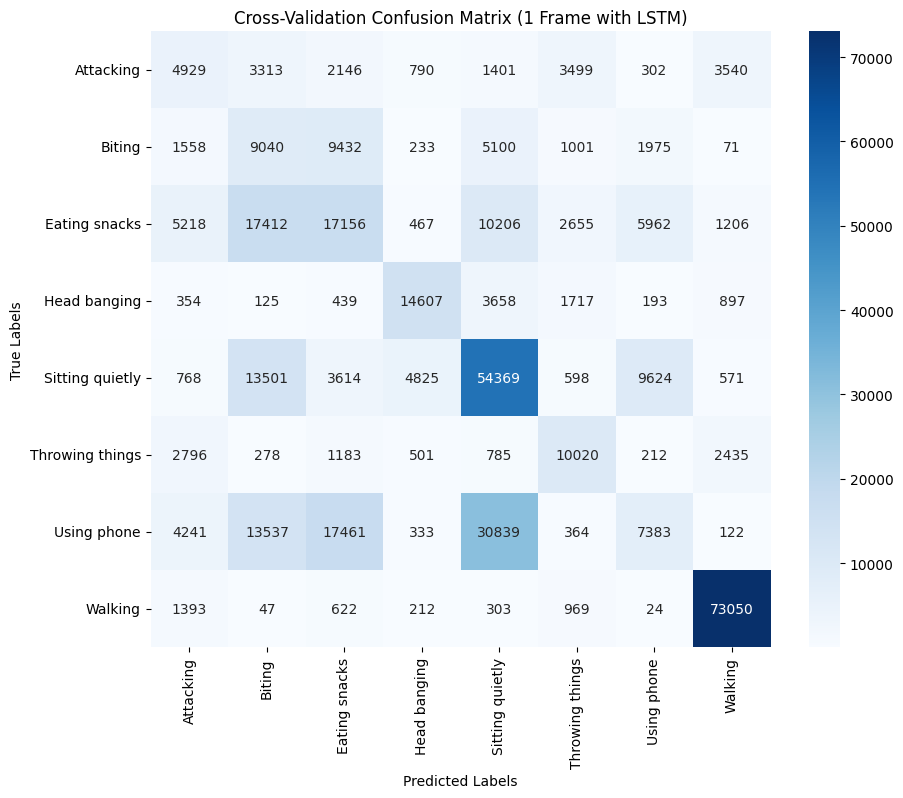

Confusion matrix saved to: result/all/1_frame.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/g_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/g_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/g_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/g_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/g_feature/features_with_labels_nabe.csv'
}

# クロスバリデーション用の初期化
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []
total_conf_matrix = None

# クロスバリデーションのループ
for test_person_key in file_paths:
    test_file = file_paths[test_person_key]
    print(f"Using {test_file} as test data...")

    # テストデータを読み込み
    test_data = pd.read_csv(test_file)

    # 残りのデータをトレーニングデータとして読み込み
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # データをLSTM用の3次元データに変換（1フレームのみをタイムステップとして扱う）
    X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
    X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # (タイムステップ, 特徴量数)
    model.add(LSTM(64))  # LSTMのユニット数
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred = np.argmax(model.predict(X_test), axis=1)

    # 各スコアを計算
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    total_accuracy.append(accuracy)
    total_precision.append(precision)
    total_recall.append(recall)
    total_f1.append(f1)

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列を保存するフォルダを作成
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Cross-Validation Confusion Matrix (1 Frame with LSTM)")

output_path = os.path.join(output_dir, "1_frame.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/n_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/n_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/n_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/n_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/n_feature/features_with_labels_nabe.csv'
}

# クロスバリデーション用の初期化
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []
total_conf_matrix = None

# クロスバリデーションのループ
for test_person_key in file_paths:
    test_file = file_paths[test_person_key]
    print(f"Using {test_file} as test data...")

    # テストデータを読み込み
    test_data = pd.read_csv(test_file)

    # 残りのデータをトレーニングデータとして読み込み
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # データをLSTM用の3次元データに変換（1フレームのみをタイムステップとして扱う）
    X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
    X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # (タイムステップ, 特徴量数)
    model.add(LSTM(64))  # LSTMのユニット数
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred = np.argmax(model.predict(X_test), axis=1)

    # 各スコアを計算
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    total_accuracy.append(accuracy)
    total_precision.append(precision)
    total_recall.append(recall)
    total_f1.append(f1)

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列を保存するフォルダを作成
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Cross-Validation Confusion Matrix (1 Frame with LSTM)")

output_path = os.path.join(output_dir, "1_frame.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# クロスバリデーション用の初期化
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []
total_conf_matrix = None

# クロスバリデーションのループ
for test_person_key in file_paths:
    test_file = file_paths[test_person_key]
    print(f"Using {test_file} as test data...")

    # テストデータを読み込み
    test_data = pd.read_csv(test_file)

    # 残りのデータをトレーニングデータとして読み込み
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # データをLSTM用の3次元データに変換（1フレームのみをタイムステップとして扱う）
    X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
    X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # (タイムステップ, 特徴量数)
    model.add(LSTM(64))  # LSTMのユニット数
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred = np.argmax(model.predict(X_test), axis=1)

    # 各スコアを計算
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    total_accuracy.append(accuracy)
    total_precision.append(precision)
    total_recall.append(recall)
    total_f1.append(f1)

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列を保存するフォルダを作成
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title("Cross-Validation Confusion Matrix Ratios (Time Steps=1)")
plt.tight_layout()
output_path = os.path.join(output_dir, "14futures_1_frame.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.6661 - loss: 0.9112
Epoch 2/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7785 - loss: 0.6280
Epoch 3/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7926 - loss: 0.5910
Epoch 4/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8052 - loss: 0.5586
Epoch 5/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.8148 - loss: 0.5381
Epoch 6/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8196 - loss: 0.5250
Epoch 7/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8227 - loss: 0.5153
Epoch 8/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8238 - loss: 0.5101
Epoch 9/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8285 - loss: 0.5003
Epoch 10/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8291 - loss: 0.4968
Epoch 11/2

NameError: name 'conf_matrix_ratio_df' is not defined

<Figure size 1200x1000 with 0 Axes>

In [ ]:
%cd Experiment

/content/drive/MyDrive/yolov7/Experiment


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.6731 - loss: 0.8942
Epoch 2/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7781 - loss: 0.6301
Epoch 3/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.7956 - loss: 0.5840
Epoch 4/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8055 - loss: 0.5600
Epoch 5/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8145 - loss: 0.5393
Epoch 6/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8183 - loss: 0.5309
Epoch 7/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8216 - loss: 0.5188
Epoch 8/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8232 - loss: 0.5148
Epoch 9/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8269 - loss: 0.5057
Epoch 10/20
10155/10155 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.8290 - loss: 0.4985
Epoch 11/2

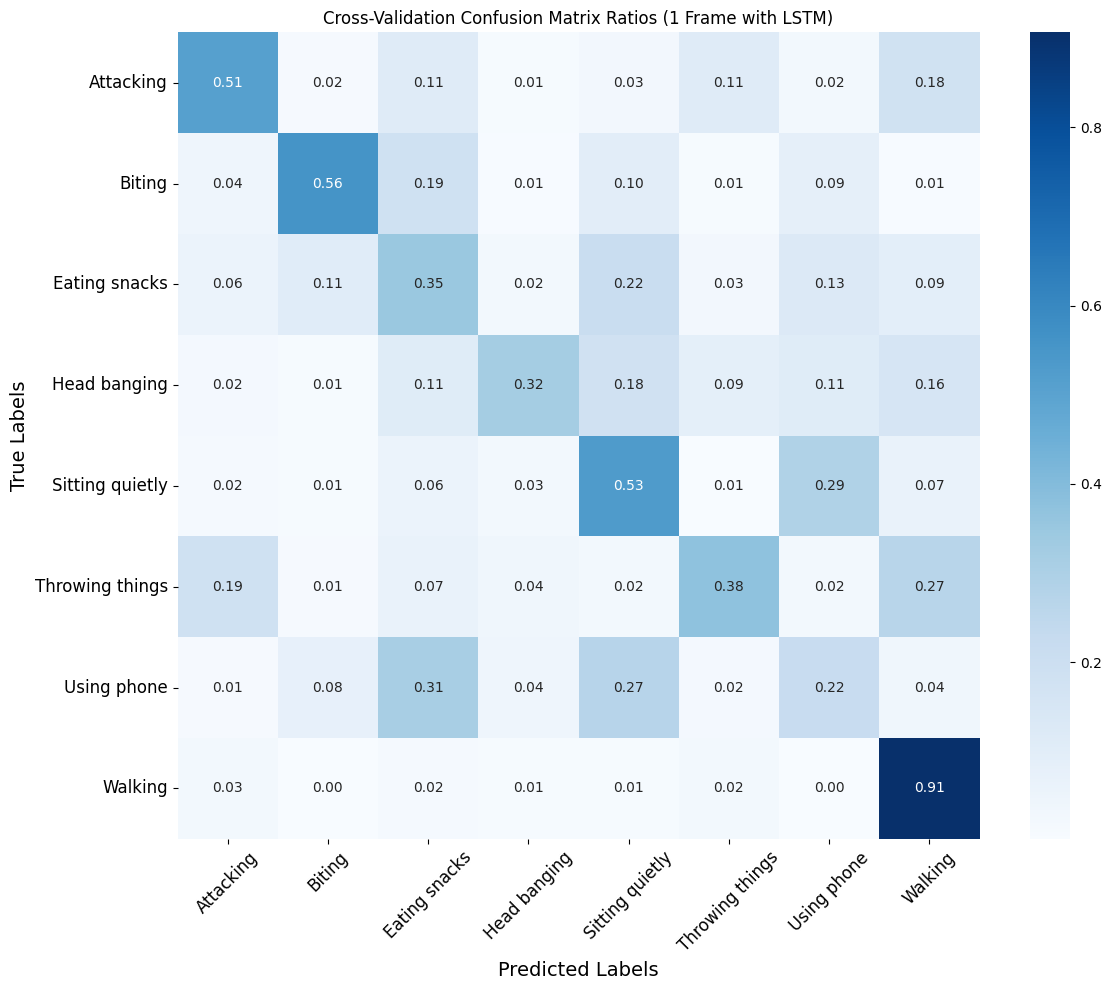

Confusion matrix with ratios saved to: result/all/14futures_1_frame_ratios.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# クロスバリデーション用の初期化
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []
total_conf_matrix = None

# クロスバリデーションのループ
for test_person_key in file_paths:
    test_file = file_paths[test_person_key]
    print(f"Using {test_file} as test data...")

    # テストデータを読み込み
    test_data = pd.read_csv(test_file)

    # 残りのデータをトレーニングデータとして読み込み
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # データをLSTM用の3次元データに変換（1フレームのみをタイムステップとして扱う）
    X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
    X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # (タイムステップ, 特徴量数)
    model.add(LSTM(64))  # LSTMのユニット数
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred = np.argmax(model.predict(X_test), axis=1)

    # 各スコアを計算
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    total_accuracy.append(accuracy)
    total_precision.append(precision)
    total_recall.append(recall)
    total_f1.append(f1)

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列を割合に変換
conf_matrix_ratio = total_conf_matrix.astype('float') / total_conf_matrix.sum(axis=1)[:, np.newaxis]

# 混同行列をヒートマップで表示・保存
conf_matrix_ratio_df = pd.DataFrame(conf_matrix_ratio, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列を保存するフォルダを作成
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title("Cross-Validation Confusion Matrix Ratios (Time Steps=1)")
plt.tight_layout()
output_path = os.path.join(output_dir, "14futures_1_frame_ratios.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with ratios saved to: {output_path}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 30
def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# 全データを統合してラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)  # 形状を固定
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列を割合に変換
conf_matrix_ratio = total_conf_matrix.astype('float') / total_conf_matrix.sum(axis=1)[:, np.newaxis]

# 割合をヒートマップで表示・保存
conf_matrix_ratio_df = pd.DataFrame(conf_matrix_ratio, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix Ratios (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"conf_matrix_ratio_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with ratios saved to: {output_path}")


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7231 - loss: 0.8558
Epoch 2/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9405 - loss: 0.1734
Epoch 3/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9629 - loss: 0.1061
Epoch 4/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9726 - loss: 0.0804
Epoch 5/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9706 - loss: 0.0823
Epoch 6/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9858 - loss: 0.0417
Epoch 7/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9867 - loss: 0.0393
Epoch 8/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9878 - loss: 0.0366
Epoch 9/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9864 - loss: 0.0373
Epoch 10/20
211/613 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9910 - loss: 0.0306

KeyboardInterrupt: 

In [ ]:
%cd Experiment

/content/drive/MyDrive/yolov7/Experiment


/content/drive/MyDrive/yolov7/Experiment
Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6625 - loss: 1.0116
Epoch 2/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9765 - loss: 0.0929
Epoch 3/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9868 - loss: 0.0451
Epoch 4/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9923 - loss: 0.0248
Epoch 5/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9937 - loss: 0.0204
Epoch 6/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9953 - loss: 0.0150
Epoch 7/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9915 - loss: 0.0307
Epoch 8/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9937 - loss: 0.0186
Epoch 9/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9972 - loss: 0.0086
Epoch 10/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9977 - loss: 0.0082
Epoch 11/20
483/483

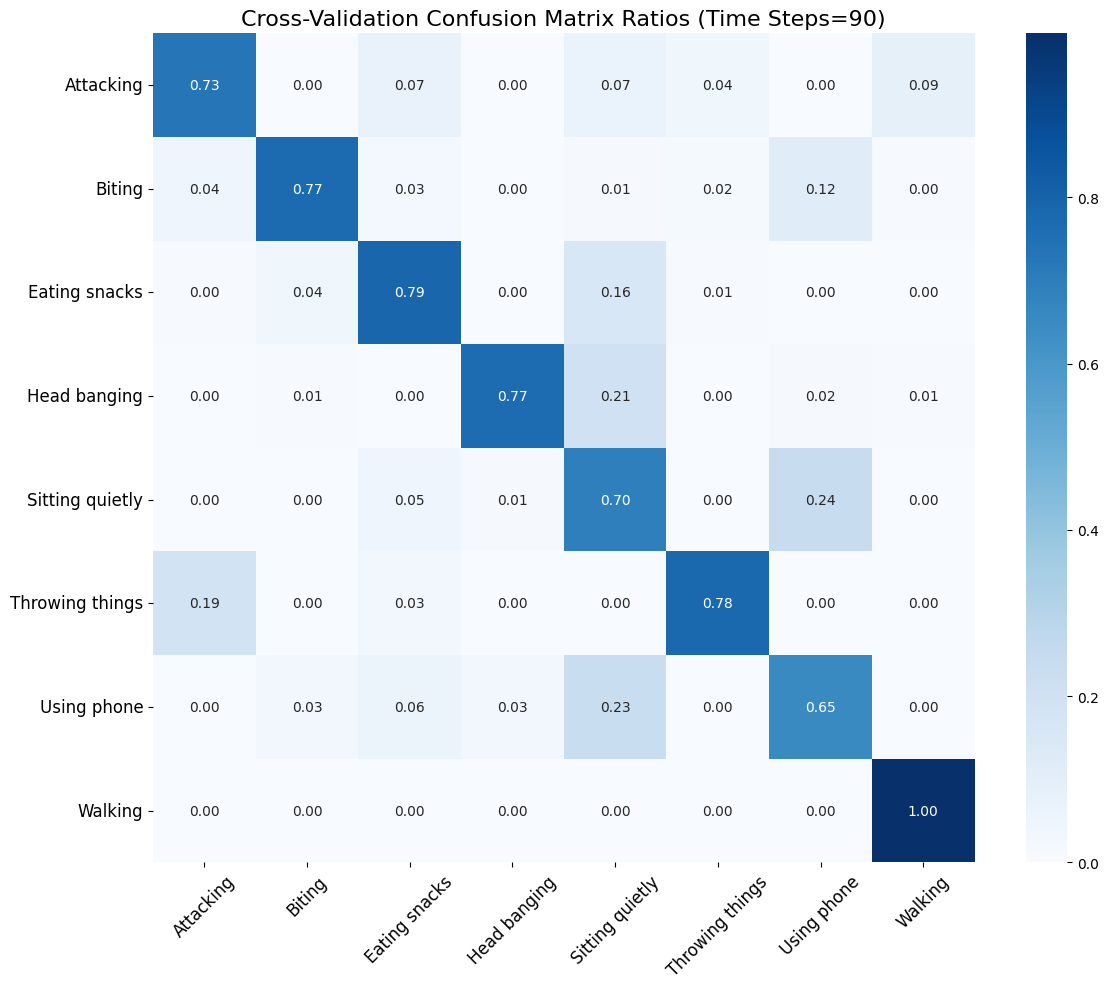

Confusion matrix with ratios saved to: result/all/conf_matrix_ratio_timestep_90.png


In [ ]:
%cd Experiment
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 90
def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# 全データを統合してラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)  # 形状を固定
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列を割合に変換
conf_matrix_ratio = total_conf_matrix.astype('float') / total_conf_matrix.sum(axis=1)[:, np.newaxis]

# 割合をヒートマップで表示・保存
conf_matrix_ratio_df = pd.DataFrame(conf_matrix_ratio, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整
plt.title(f"Cross-Validation Confusion Matrix Ratios (Time Steps={time_steps})", fontsize=16)
plt.tight_layout()  # レイアウトを自動調整

output_path = os.path.join(output_dir, f"conf_matrix_ratio_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with ratios saved to: {output_path}")


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.7003 - loss: 0.9166
Epoch 2/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9655 - loss: 0.1250
Epoch 3/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9800 - loss: 0.0686
Epoch 4/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9879 - loss: 0.0371
Epoch 5/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9935 - loss: 0.0228
Epoch 6/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9884 - loss: 0.0383
Epoch 7/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9915 - loss: 0.0288
Epoch 8/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9944 - loss: 0.0170
Epoch 9/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9919 - loss: 0.0271
Epoch 10/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9932 - loss: 0.0210
Epoch 11/20
483/483 ━━━━━━━━━━━━━━━━━━━━

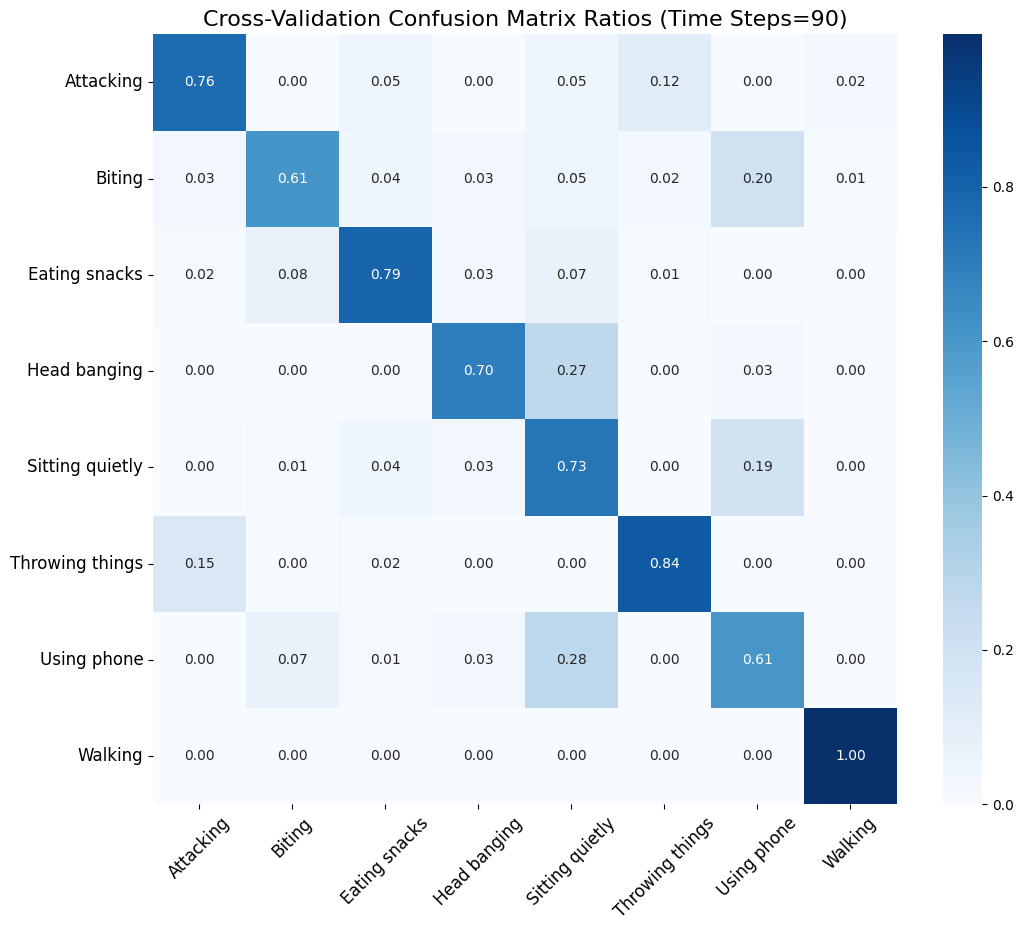

Confusion matrix with ratios saved to: result/all/conf_matrix_ratio_timestep_90.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 90
def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# 全データを統合してラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)  # 形状を固定
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列を割合に変換
conf_matrix_ratio = total_conf_matrix.astype('float') / total_conf_matrix.sum(axis=1)[:, np.newaxis]

# 割合をヒートマップで表示・保存
conf_matrix_ratio_df = pd.DataFrame(conf_matrix_ratio, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(12, 10))  # 画像サイズを大きく調整
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_,
            annot_kws={"size": 10})  # 数字のフォントサイズ調整
plt.xticks(fontsize=12, rotation=45)  # x軸ラベルサイズと回転を調整
plt.yticks(fontsize=12)  # y軸ラベルサイズ調整

plt.title(f"Cross-Validation Confusion Matrix Ratios (Time Steps={time_steps})", fontsize=16)
 # レイアウトを自動調整

output_path = os.path.join(output_dir, f"conf_matrix_ratio_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with ratios saved to: {output_path}")


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6816 - loss: 0.9269
Epoch 2/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9469 - loss: 0.1639
Epoch 3/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9649 - loss: 0.1067
Epoch 4/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9746 - loss: 0.0708
Epoch 5/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9814 - loss: 0.0512
Epoch 6/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9827 - loss: 0.0497
Epoch 7/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9795 - loss: 0.0572
Epoch 8/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9888 - loss: 0.0332
Epoch 9/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9905 - loss: 0.0296
Epoch 10/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9887 - loss: 0.0323
Epoch 11/20
613/613 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step -

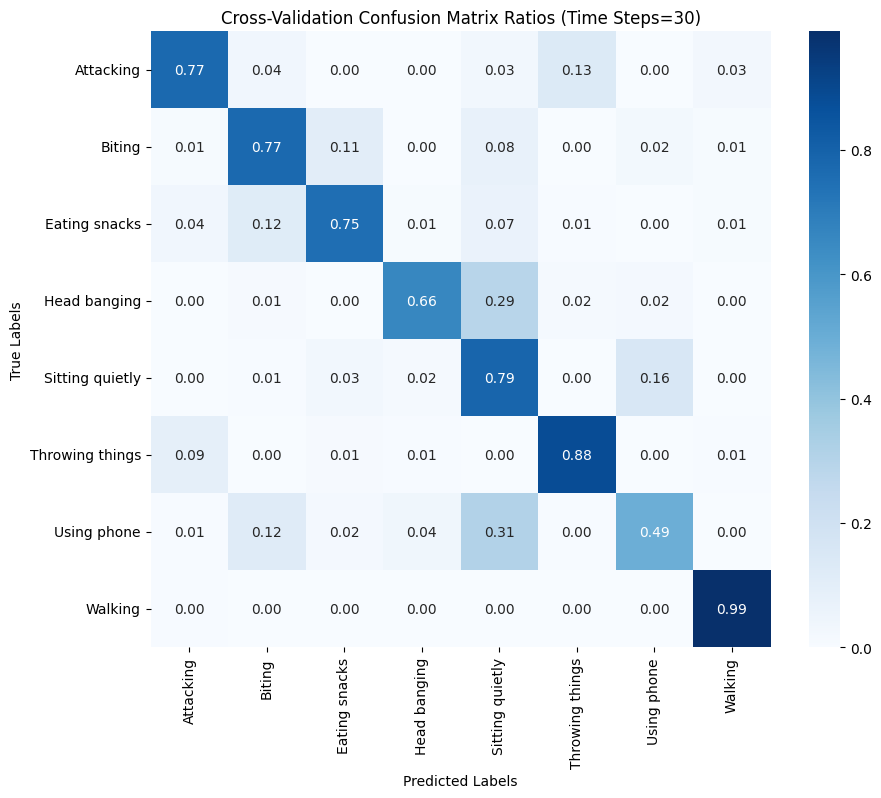

Confusion matrix with ratios saved to: result/all/conf_matrix_ratio_timestep_30.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 30  # 任意のシーケンス長

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences)
    if total_conf_matrix is None:
        total_conf_matrix = conf_matrix
    else:
        total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列を割合に変換
conf_matrix_ratio = total_conf_matrix.astype('float') / total_conf_matrix.sum(axis=1)[:, np.newaxis]

# 割合をヒートマップで表示・保存
conf_matrix_ratio_df = pd.DataFrame(conf_matrix_ratio, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix Ratios (Time Steps={time_steps})")

output_path_ratio = os.path.join(output_dir, f"conf_matrix_ratio_timestep_{time_steps}.png")
plt.savefig(output_path_ratio)
plt.show()

print(f"Confusion matrix with ratios saved to: {output_path_ratio}")


In [ ]:
%cd Experiment

/content/drive/MyDrive/yolov7/Experiment


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - accuracy: 0.7250 - loss: 0.8853
Epoch 2/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9810 - loss: 0.0778
Epoch 3/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9898 - loss: 0.0363
Epoch 4/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9913 - loss: 0.0297
Epoch 5/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9938 - loss: 0.0190
Epoch 6/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9951 - loss: 0.0133
Epoch 7/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9947 - loss: 0.0158
Epoch 8/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9945 - loss: 0.0167
Epoch 9/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9964 - loss: 0.0144
Epoch 10/20
483/483 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9950 - loss: 0.0152
Epoch 11/20
483/483 ━━━━━━━━━━━━━━━━━━━━

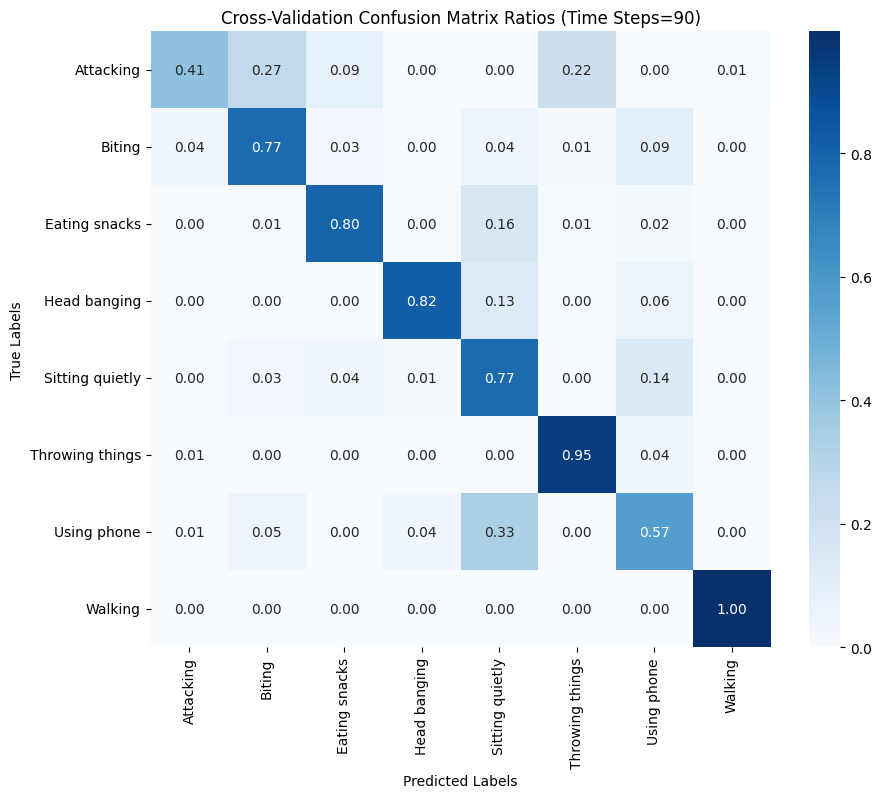

Confusion matrix with ratios saved to: result/all/conf_matrix_ratio_timestep_90.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 90  # 任意のシーケンス長

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# 全データを統合してラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)  # 形状を固定
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列を割合に変換
conf_matrix_ratio = total_conf_matrix.astype('float') / total_conf_matrix.sum(axis=1)[:, np.newaxis]

# 割合をヒートマップで表示・保存
conf_matrix_ratio_df = pd.DataFrame(conf_matrix_ratio, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_ratio_df, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix Ratios (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"conf_matrix_ratio_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix with ratios saved to: {output_path}")


レングスシーケンス


Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7467 - loss: 0.7239
Epoch 2/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9123 - loss: 0.2451
Epoch 3/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9328 - loss: 0.1867
Epoch 4/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9436 - loss: 0.1559
Epoch 5/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9534 - loss: 0.1308
Epoch 6/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9572 - loss: 0.1210
Epoch 7/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9608 - loss: 0.1085
Epoch 8/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9626 - loss: 0.1057
Epoch 9/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9649 - loss: 0.1023
Epoch 10/20
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9700 - loss: 0.0847
Epoch 11/20
2000/2000 ━━━━━━━━

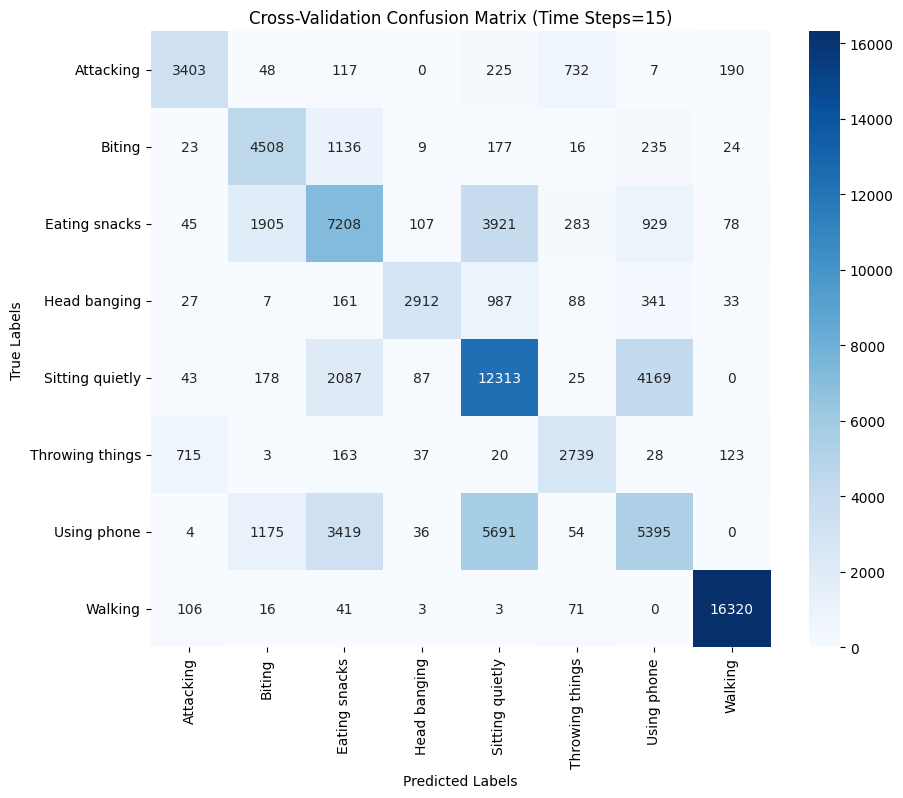

Confusion matrix saved to: result/all/cross_validation_conf_matrix_timestep_15.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 0  # 任意のシーケンス長

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences)
    if total_conf_matrix is None:
        total_conf_matrix = conf_matrix
    else:
        total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"new_conf_matrix_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


レングスシーケンス２０

Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7009 - loss: 0.8872
Epoch 2/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9218 - loss: 0.2100
Epoch 3/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9505 - loss: 0.1317
Epoch 4/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9617 - loss: 0.1031
Epoch 5/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9686 - loss: 0.0867
Epoch 6/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9695 - loss: 0.0792
Epoch 7/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9807 - loss: 0.0576
Epoch 8/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9816 - loss: 0.0517
Epoch 9/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9833 - loss: 0.0471
Epoch 10/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9851 - loss: 0.0447
Epoch 11/20
967/967 ━━━━━━━━━━━━━━━━━━━━

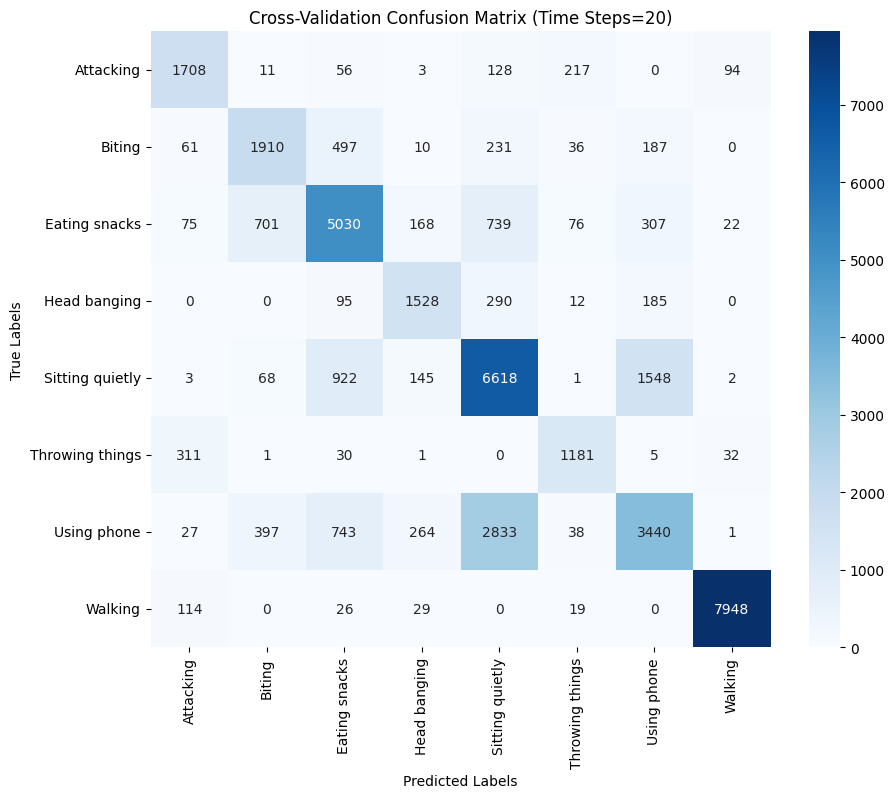

Confusion matrix saved to: result/all/cross_validation_conf_matrix_timestep_20.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 20  # 任意のシーケンス長

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences)
    if total_conf_matrix is None:
        total_conf_matrix = conf_matrix
    else:
        total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"cross_validation_conf_matrix_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


レングスシーケンス１０

Using data/feature/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7395 - loss: 0.7482
Epoch 2/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8928 - loss: 0.3038
Epoch 3/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9101 - loss: 0.2529
Epoch 4/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9193 - loss: 0.2280
Epoch 5/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9300 - loss: 0.1988
Epoch 6/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9314 - loss: 0.1930
Epoch 7/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9356 - loss: 0.1810
Epoch 8/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9401 - loss: 0.1696
Epoch 9/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9382 - loss: 0.1687
Epoch 10/20
2011/2011 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9459 - loss: 0.1548
Epoch 11/20
2011/2011 ━━━━━━━━

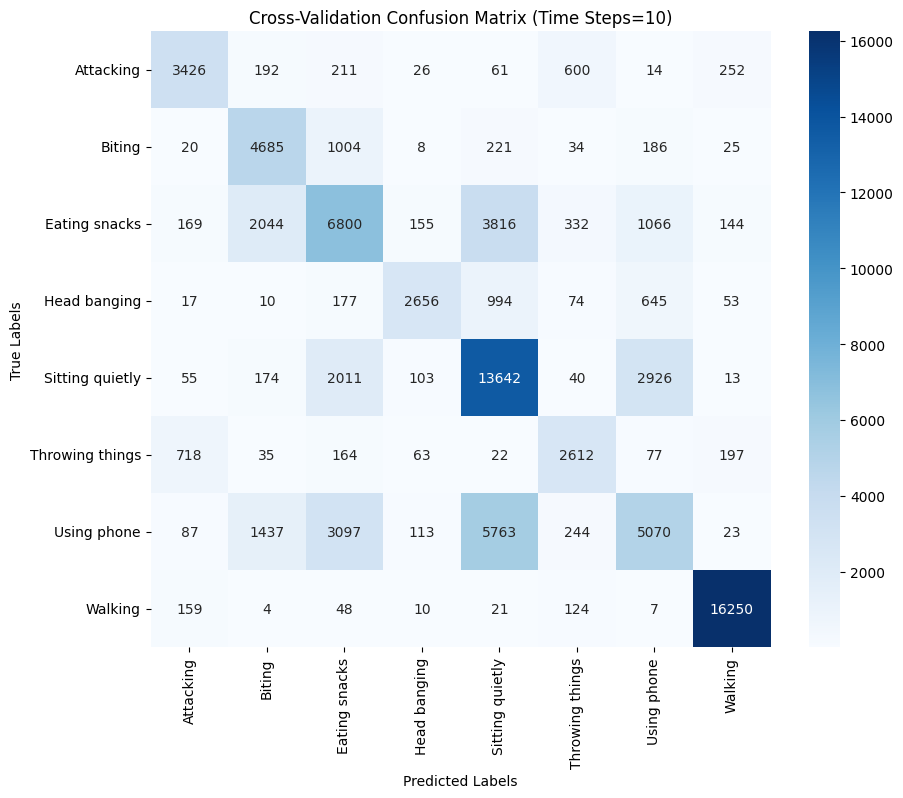

Confusion matrix saved to: result/all/cross_validation_conf_matrix_timestep_10.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/new_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/new_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/new_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/new_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 10  # 任意のシーケンス長

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences)
    if total_conf_matrix is None:
        total_conf_matrix = conf_matrix
    else:
        total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"cross_validation_conf_matrix_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


#1person as training data and 1 person as test data


*   LSTM









#lstm

Baseline


---



Using data/feature/g_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7150 - loss: 0.8284
Epoch 2/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8233 - loss: 0.5385
Epoch 3/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8409 - loss: 0.4849
Epoch 4/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.8497 - loss: 0.4566
Epoch 5/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8564 - loss: 0.4396
Epoch 6/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8600 - loss: 0.4249
Epoch 7/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8639 - loss: 0.4127
Epoch 8/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8662 - loss: 0.4054
Epoch 9/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8699 - loss: 0.3974
Epoch 10/20
8998/8998 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8727 - loss: 0.3862
Epoch 11/20
8998/8998 ━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using data/feature/g_feature/features_with_labels_umang.csv as test data...
Epoch 1/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.7192 - loss: 0.8297
Epoch 2/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8138 - loss: 0.5693
Epoch 3/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8314 - loss: 0.5179
Epoch 4/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8414 - loss: 0.4859
Epoch 5/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8471 - loss: 0.4686
Epoch 6/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8515 - loss: 0.4547
Epoch 7/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.8532 - loss: 0.4486
Epoch 8/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8555 - loss: 0.4424
Epoch 9/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8570 - loss: 0.4346
Epoch 10/20
8923/8923 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8593 - loss: 0.4286
Epoch 11/20
8923/8923 ━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using data/feature/g_feature/features_with_labels_yutaro.csv as test data...
Epoch 1/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.6984 - loss: 0.8785
Epoch 2/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7853 - loss: 0.6341
Epoch 3/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8033 - loss: 0.5751
Epoch 4/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8154 - loss: 0.5449
Epoch 5/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8217 - loss: 0.5262
Epoch 6/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8249 - loss: 0.5190
Epoch 7/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.8286 - loss: 0.5044
Epoch 8/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.8303 - loss: 0.5004
Epoch 9/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.8326 - loss: 0.4941
Epoch 10/20
11451/11451 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - accuracy: 0.8358 - loss: 0.4846
Epoch 11/20


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Using data/feature/g_feature/features_with_labels_aoi.csv as test data...
Epoch 1/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7210 - loss: 0.8162
Epoch 2/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8062 - loss: 0.5753
Epoch 3/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8195 - loss: 0.5304
Epoch 4/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8294 - loss: 0.5035
Epoch 5/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8335 - loss: 0.4881
Epoch 6/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8393 - loss: 0.4738
Epoch 7/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8442 - loss: 0.4614
Epoch 8/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8453 - loss: 0.4553
Epoch 9/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8498 - loss: 0.4452
Epoch 10/20
9935/9935 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.8519 - loss: 0.4395
Epoch 11/20
9935/9935 ━━━━━━━━━━━━━

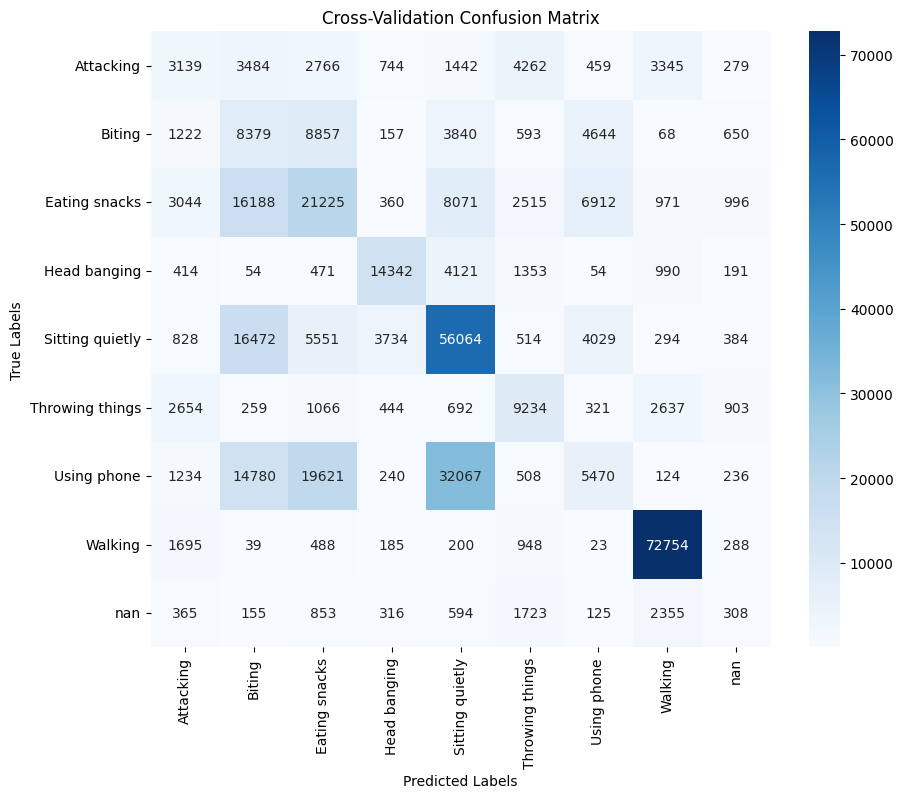

Confusion matrix saved to: result/all/feature_7_timestep_1.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'data/feature/g_feature/features_with_labels_prerna.csv',
    'person2': 'data/feature/g_feature/features_with_labels_umang.csv',
    'person3': 'data/feature/g_feature/features_with_labels_yutaro.csv',
    'person4': 'data/feature/g_feature/features_with_labels_aoi.csv',
    'person5': 'data/feature/g_feature/features_with_labels_nabe.csv'
}

# クロスバリデーション用の初期化
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []
total_conf_matrix = None

# クロスバリデーションのループ
for test_person_key in file_paths:
    test_file = file_paths[test_person_key]
    print(f"Using {test_file} as test data...")

    # テストデータを読み込み
    test_data = pd.read_csv(test_file)

    # 残りのデータをトレーニングデータとして読み込み
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # LSTM用の3次元にデータをリシェイプ（例: 1タイムステップ）
    X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
    X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred = np.argmax(model.predict(X_test), axis=1)

    # 各スコアを計算
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    total_accuracy.append(accuracy)
    total_precision.append(precision)
    total_recall.append(recall)
    total_f1.append(f1)

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列を保存するフォルダを作成
output_dir = "result/all"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Cross-Validation Confusion Matrix")

output_path = os.path.join(output_dir, "feature_7_timestep_1.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


Baseline+LLMs(feature=10)

Using ex/n_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.6774 - loss: 0.9265
Epoch 2/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.7556 - loss: 0.7051
Epoch 3/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7714 - loss: 0.6612
Epoch 4/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7861 - loss: 0.6274
Epoch 5/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.7919 - loss: 0.6072
Epoch 6/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.7984 - loss: 0.5931
Epoch 7/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8031 - loss: 0.5810
Epoch 8/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.8074 - loss: 0.5685
Epoch 9/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8095 - loss: 0.5623
Epoch 10/20
10782/10782 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.8122 - loss: 0.5531
Epoch 11/20
10782/1078

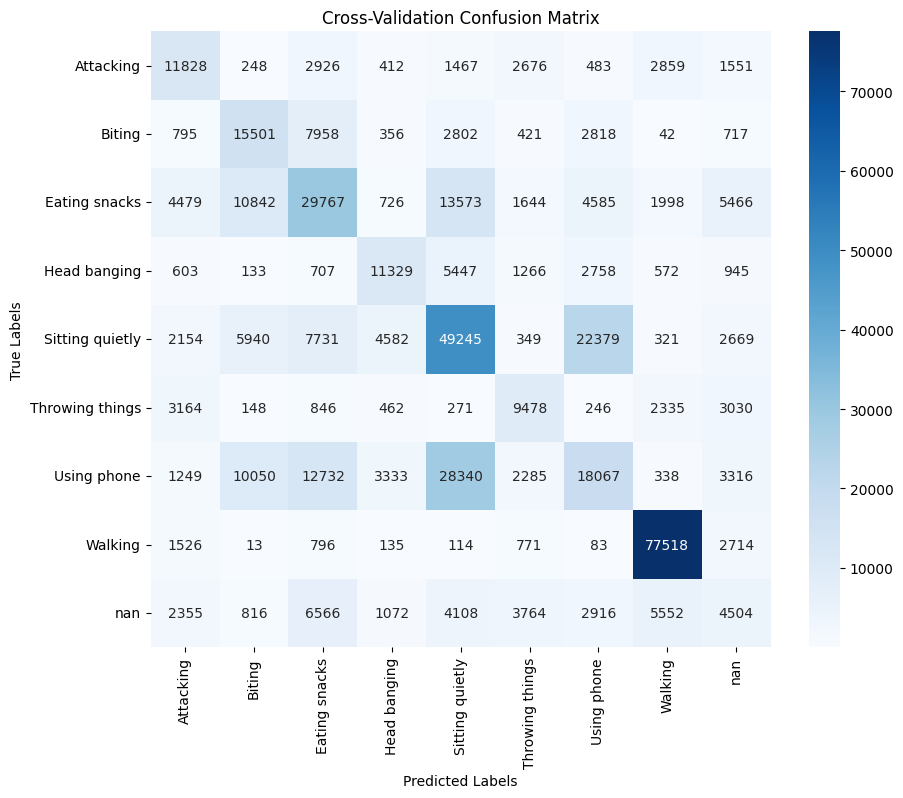

Confusion matrix saved to: cross_validation_confusion_matrix/baseline.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'ex/n_feature/features_with_labels_prerna.csv',
    'person2': 'ex/n_feature/features_with_labels_umang.csv',
    'person3': 'ex/n_feature/features_with_labels_yutaro.csv',
    'person4': 'ex/n_feature/features_with_labels_aoi.csv',
    'person5': 'ex/n_feature/features_with_labels_nabe.csv'
}

# クロスバリデーション用の初期化
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []
total_conf_matrix = None

# クロスバリデーションのループ
for test_person_key in file_paths:
    test_file = file_paths[test_person_key]
    print(f"Using {test_file} as test data...")

    # テストデータを読み込み
    test_data = pd.read_csv(test_file)

    # 残りのデータをトレーニングデータとして読み込み
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # LSTM用の3次元にデータをリシェイプ（例: 1タイムステップ）
    X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
    X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred = np.argmax(model.predict(X_test), axis=1)

    # 各スコアを計算
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    total_accuracy.append(accuracy)
    total_precision.append(precision)
    total_recall.append(recall)
    total_f1.append(f1)

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test, y_test_pred, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列を保存するフォルダを作成
output_dir = "cross_validation_confusion_matrix"
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Cross-Validation Confusion Matrix")

output_path = os.path.join(output_dir, "feature_10_timestep_1.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


Baseline+LLMs(feature=14)

Using ex/new_feature/features_with_labels_nabe.csv as test data...
Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5493 - loss: 1.2568
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7227 - loss: 0.7726
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7312 - loss: 0.7315
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7425 - loss: 0.6968
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7580 - loss: 0.6671
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7597 - loss: 0.6517
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7677 - loss: 0.6442
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7723 - loss: 0.6292
Epoch 9/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7801 - loss: 0.6136
Epoch 10/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7821 - loss: 0.6083
Epoch 11/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7843 

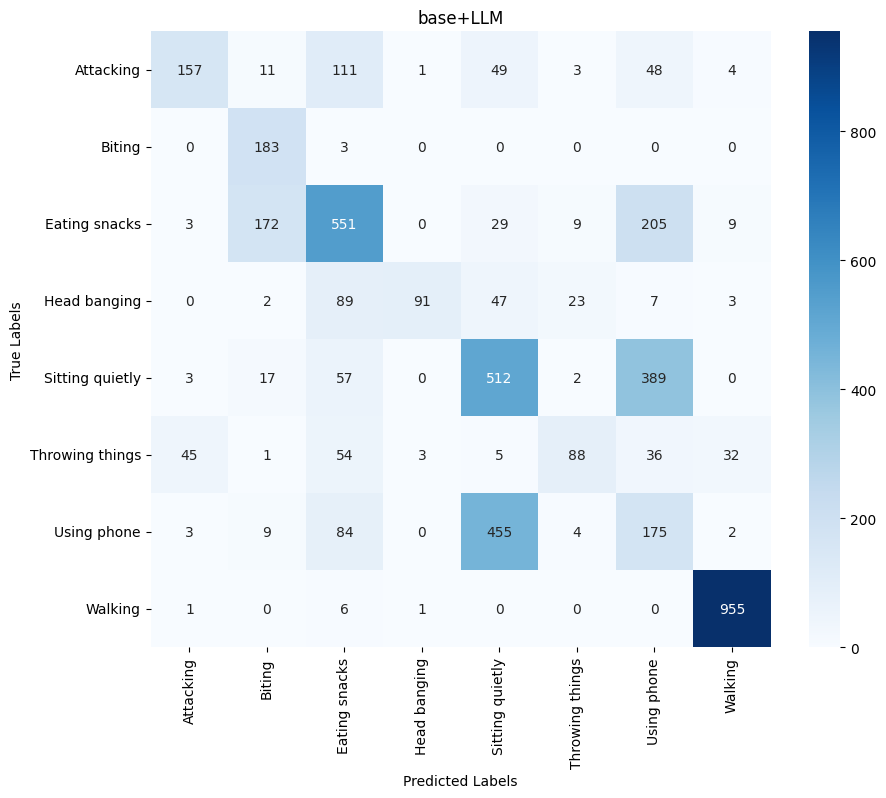

Confusion matrix saved to: new_confusion_matrix/base+LLM.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# 4つのファイルをリスト化
file_paths = {
    'person1': 'ex/new_feature/features_with_labels_prerna.csv',
    'person2': 'ex/new_feature/features_with_labels_umang.csv',
    'person3': 'ex/new_feature/features_with_labels_yutaro.csv',
    'person4': 'ex/new_feature/features_with_labels_aoi.csv',
    'person5': 'ex/new_feature/features_with_labels_nabe.csv'
}

# テストファイルを指定
test_person_key = 'person5'  # テストデータとして使用する人物のキー（person1, person2, person3, person4）
test_file = file_paths[test_person_key]
print(f"Using {test_file} as test data...")

# テストデータを読み込み
test_data = pd.read_csv(test_file)

# 残りのデータをトレーニングデータとして読み込み
train_files = [file_paths[key] for key in file_paths if key != test_person_key]
train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

# 特徴量とラベルを分割
X_train = train_data.drop(columns=['action'])
y_train = train_data['action']
X_test = test_data.drop(columns=['action'])
y_test = test_data['action']

# 数値データに変換し、NaNを処理
X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
y_test = y_test[X_test.index]

# LSTM用の3次元にデータをリシェイプ（例: 1タイムステップ）
X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

# ラベルを数値にエンコード
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# LSTMモデルの構築
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルのトレーニング
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# テストデータで予測
y_test_pred = np.argmax(model.predict(X_test), axis=1)

# 各スコアを計算
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# 結果を表示
print("\nTest Scores:")
print(f'Accuracy: {test_accuracy:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print(f'F1 Score: {test_f1:.2f}')

# 混同行列を計算
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

# 混同行列を保存するフォルダを作成
output_dir = "new_confusion_matrix"  # フォルダ名を固定
os.makedirs(output_dir, exist_ok=True)

# 混同行列をヒートマップで表示・保存
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"base+LLM")

# ファイル名を "base+LLM.png" に固定
output_path = os.path.join(output_dir, "base+LLM.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


base+LLM(クロスバリデーション)


Using ex/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6932 - loss: 0.9115
Epoch 2/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8274 - loss: 0.5014
Epoch 3/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8375 - loss: 0.4665
Epoch 4/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8483 - loss: 0.4388
Epoch 5/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8517 - loss: 0.4237
Epoch 6/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8573 - loss: 0.4092
Epoch 7/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8597 - loss: 0.3976
Epoch 8/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8653 - loss: 0.3850
Epoch 9/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8681 - loss: 0.3823
Epoch 10/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8689 - loss: 0.3774
Epoch 11/20
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/

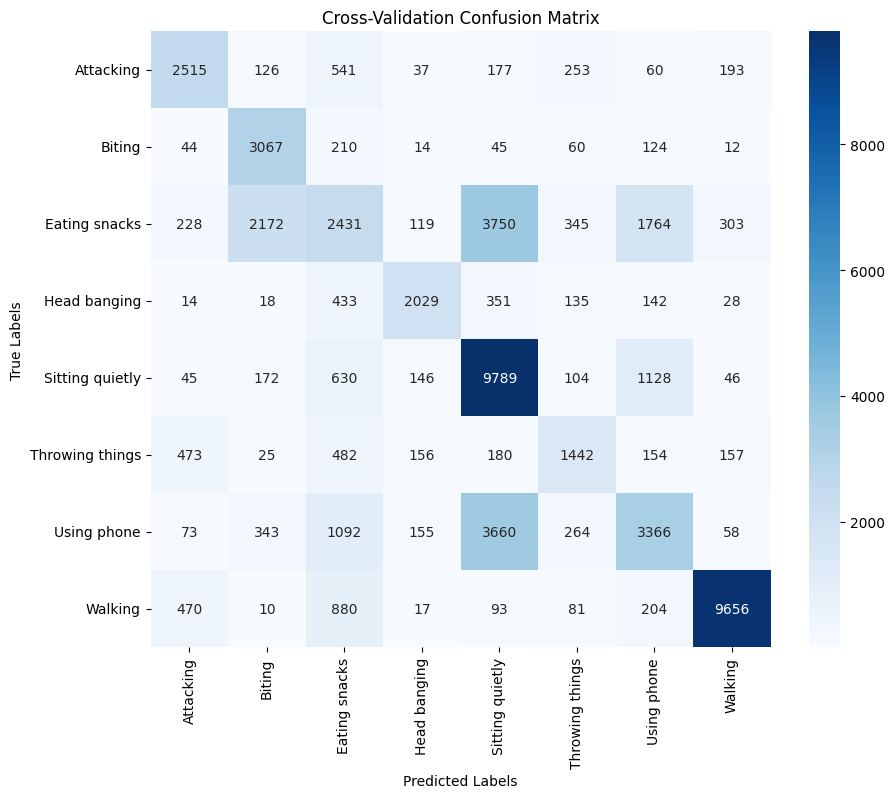

Confusion matrix saved to: cross_validation_conf_matrix/cross_validation_base+LLM.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# 5つのファイルをリスト化
file_paths = {
    'person1': 'ex/new_feature/features_with_labels_prerna.csv',
    'person2': 'ex/new_feature/features_with_labels_umang.csv',
    'person3': 'ex/new_feature/features_with_labels_yutaro.csv',
    'person4': 'ex/new_feature/features_with_labels_aoi.csv',
    'person5': 'ex/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # LSTM用の3次元にデータをリシェイプ（例: 1タイムステップ）
    X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
    X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred = np.argmax(model.predict(X_test), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test, y_test_pred))
    total_precision.append(precision_score(y_test, y_test_pred, average='weighted'))
    total_recall.append(recall_score(y_test, y_test_pred, average='weighted'))
    total_f1.append(f1_score(y_test, y_test_pred, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    if total_conf_matrix is None:
        total_conf_matrix = conf_matrix
    else:
        total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "cross_validation_conf_matrix"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Cross-Validation Confusion Matrix")

output_path = os.path.join(output_dir, "cross_validation_base+LLM.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


Base＋LLM＋レングスシーケンス(30)

In [ ]:
pwd

'/content/drive/MyDrive/yolov7/Experiment'

Base＋LLM＋レングスシーケンス(60)

Using ex/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.6637 - loss: 1.0057
Epoch 2/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9296 - loss: 0.2138
Epoch 3/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9630 - loss: 0.1133
Epoch 4/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9720 - loss: 0.0826
Epoch 5/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9834 - loss: 0.0502
Epoch 6/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9839 - loss: 0.0507
Epoch 7/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9922 - loss: 0.0226
Epoch 8/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9898 - loss: 0.0240
Epoch 9/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9926 - loss: 0.0227
Epoch 10/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9935 - loss: 0.0242
Epoch 11/20
471/471 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/

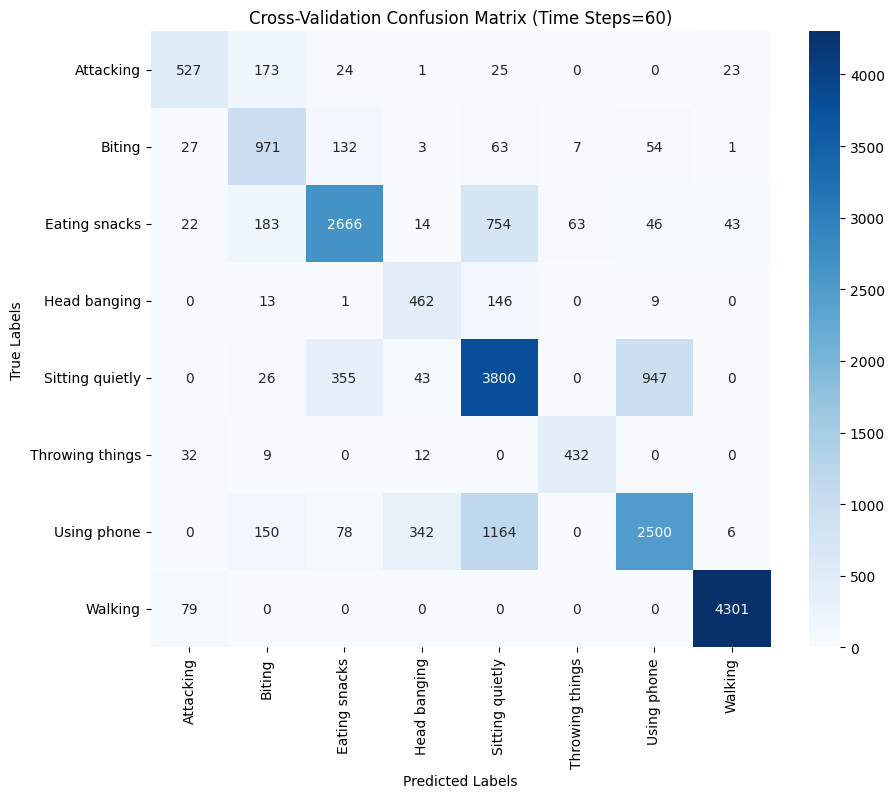

Confusion matrix saved to: cross_validation_confusion_matrix/cross_validation_conf_matrix_timestep_60.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'ex/new_feature/features_with_labels_prerna.csv',
    'person2': 'ex/new_feature/features_with_labels_umang.csv',
    'person3': 'ex/new_feature/features_with_labels_yutaro.csv',
    'person4': 'ex/new_feature/features_with_labels_aoi.csv',
    'person5': 'ex/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 60  # 任意のシーケンス長

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    label_encoder = LabelEncoder()
    y_train = label_encoder.fit_transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences)
    if total_conf_matrix is None:
        total_conf_matrix = conf_matrix
    else:
        total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "cross_validation_confusion_matrix"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"cross_validation_conf_matrix_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


Base＋LLM＋レングスシーケンス(90)

Using ex/new_feature/features_with_labels_prerna.csv as test data...
Epoch 1/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.6553 - loss: 1.0372
Epoch 2/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9582 - loss: 0.1432
Epoch 3/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9736 - loss: 0.0778
Epoch 4/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9885 - loss: 0.0379
Epoch 5/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9868 - loss: 0.0407
Epoch 6/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9914 - loss: 0.0271
Epoch 7/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9902 - loss: 0.0272
Epoch 8/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.9935 - loss: 0.0211
Epoch 9/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9987 - loss: 0.0066
Epoch 10/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9899 - loss: 0.0292
Epoch 11/20
410/410 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/

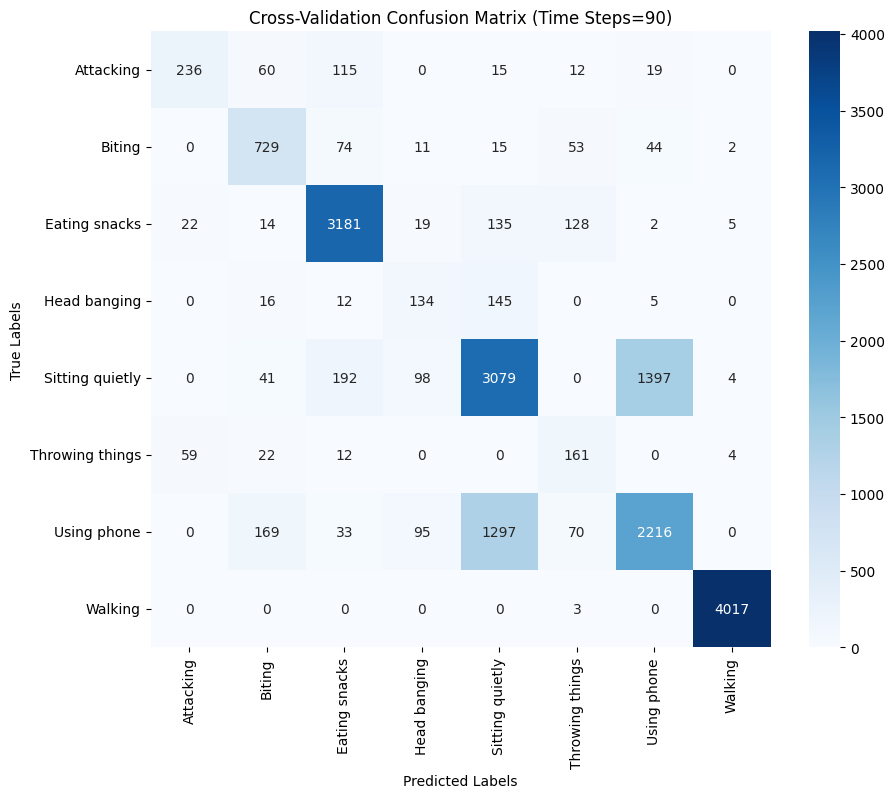

Confusion matrix saved to: cross_validation_confusion_matrix/cross_validation_conf_matrix_timestep_90.png


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os

# ファイルパスをリスト化
file_paths = {
    'person1': 'ex/new_feature/features_with_labels_prerna.csv',
    'person2': 'ex/new_feature/features_with_labels_umang.csv',
    'person3': 'ex/new_feature/features_with_labels_yutaro.csv',
    'person4': 'ex/new_feature/features_with_labels_aoi.csv',
    'person5': 'ex/new_feature/features_with_labels_nabe.csv'
}

# 混同行列とスコアの初期化
total_conf_matrix = None
total_accuracy = []
total_precision = []
total_recall = []
total_f1 = []

# タイムステップを設定
time_steps = 90  # 任意のシーケンス長

def create_sequences_by_action(X, y, time_steps):
    """
    行動ごとにシーケンスを生成し、行動のまたぎを防ぐ
    """
    sequences = []
    labels = []
    current_action = None
    buffer = []

    for i in range(len(X)):
        # 行動が変わった場合、バッファをリセット
        if y.iloc[i] != current_action:
            current_action = y.iloc[i]
            buffer = []

        buffer.append(X.iloc[i].values)

        # バッファがタイムステップに達した場合、シーケンスを作成
        if len(buffer) == time_steps:
            sequences.append(np.array(buffer))
            labels.append(current_action)
            buffer.pop(0)  # シーケンスをスライディング

    return np.array(sequences), np.array(labels)

# 全データを統合してラベルをエンコード
all_data = pd.concat([pd.read_csv(f) for f in file_paths.values()], ignore_index=True)
label_encoder = LabelEncoder()
label_encoder.fit(all_data['action'])

# クロスバリデーションのループ
for test_person_key in file_paths:
    print(f"Using {file_paths[test_person_key]} as test data...")

    # テストデータとトレーニングデータの分割
    test_file = file_paths[test_person_key]
    test_data = pd.read_csv(test_file)
    train_files = [file_paths[key] for key in file_paths if key != test_person_key]
    train_data = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)

    # 特徴量とラベルを分割
    X_train = train_data.drop(columns=['action'])
    y_train = train_data['action']
    X_test = test_data.drop(columns=['action'])
    y_test = test_data['action']

    # 数値データに変換し、NaNを処理
    X_train = X_train.apply(pd.to_numeric, errors='coerce').dropna()
    y_train = y_train[X_train.index]  # X_trainに合わせてy_trainをフィルタリング
    X_test = X_test.apply(pd.to_numeric, errors='coerce').dropna()
    y_test = y_test[X_test.index]

    # ラベルを数値にエンコード
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)

    # トレーニングデータをシーケンスに変換
    X_train_sequences, y_train_sequences = create_sequences_by_action(
        pd.DataFrame(X_train), pd.Series(y_train), time_steps
    )

    # テストデータをシーケンスに変換
    X_test_sequences, y_test_sequences = create_sequences_by_action(
        pd.DataFrame(X_test), pd.Series(y_test), time_steps
    )

    # シーケンスが空の場合はスキップ
    if len(X_train_sequences) == 0 or len(X_test_sequences) == 0:
        print(f"Skipping {test_person_key} due to insufficient data.")
        continue

    # LSTMモデルの構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))  # タイムステップを入力形状に含む
    model.add(LSTM(64))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデルのトレーニング
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=32, verbose=1)

    # テストデータで予測
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)

    # 各スコアを計算
    total_accuracy.append(accuracy_score(y_test_sequences, y_test_pred_sequences))
    total_precision.append(precision_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_recall.append(recall_score(y_test_sequences, y_test_pred_sequences, average='weighted'))
    total_f1.append(f1_score(y_test_sequences, y_test_pred_sequences, average='weighted'))

    # 混同行列を計算
    conf_matrix = confusion_matrix(y_test_sequences, y_test_pred_sequences, labels=np.arange(len(label_encoder.classes_)))
    if total_conf_matrix is None:
        total_conf_matrix = np.zeros_like(conf_matrix)  # 形状を固定
    total_conf_matrix += conf_matrix

# 平均スコアを計算
avg_accuracy = np.mean(total_accuracy)
avg_precision = np.mean(total_precision)
avg_recall = np.mean(total_recall)
avg_f1 = np.mean(total_f1)

# 結果を表示
print("\nAverage Test Scores across all folds:")
print(f'Accuracy: {avg_accuracy:.2f}')
print(f'Precision: {avg_precision:.2f}')
print(f'Recall: {avg_recall:.2f}')
print(f'F1 Score: {avg_f1:.2f}')

# 統合した混同行列をヒートマップで表示・保存
conf_matrix_df = pd.DataFrame(total_conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

output_dir = "cross_validation_confusion_matrix"
os.makedirs(output_dir, exist_ok=True)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Cross-Validation Confusion Matrix (Time Steps={time_steps})")

output_path = os.path.join(output_dir, f"cross_validation_conf_matrix_timestep_{time_steps}.png")
plt.savefig(output_path)
plt.show()

print(f"Confusion matrix saved to: {output_path}")


ハイパーパラメーターチューニング

In [ ]:
from tensorflow.keras.optimizers import Adam  # 追加

# ハイパーパラメータ候補
time_steps_candidates = [5, 10]
lstm_units_candidates = [64, 128]
batch_size_candidates = [32, 64]
learning_rate_candidates = [1e-3, 1e-4]

# 全組み合わせを生成
param_grid = list(product(time_steps_candidates, lstm_units_candidates, batch_size_candidates, learning_rate_candidates))

best_f1 = 0
best_params = None

for time_steps, lstm_units, batch_size, learning_rate in param_grid:
    # モデル構築
    model = Sequential()
    model.add(Input(shape=(time_steps, X_train_sequences.shape[2])))
    model.add(LSTM(lstm_units))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)  # 修正後
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # モデル訓練
    model.fit(X_train_sequences, y_train_sequences, epochs=20, batch_size=batch_size, verbose=0)

    # 評価
    y_test_pred_sequences = np.argmax(model.predict(X_test_sequences), axis=1)
    f1 = f1_score(y_test_sequences, y_test_pred_sequences, average='weighted')

    if f1 > best_f1:
        best_f1 = f1
        best_params = (time_steps, lstm_units, batch_size, learning_rate)

print("Best F1 Score:", best_f1)
print("Best Params:", best_params)


2243/2243 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


#7:3

randomsammpling Baseline

Test Scores:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


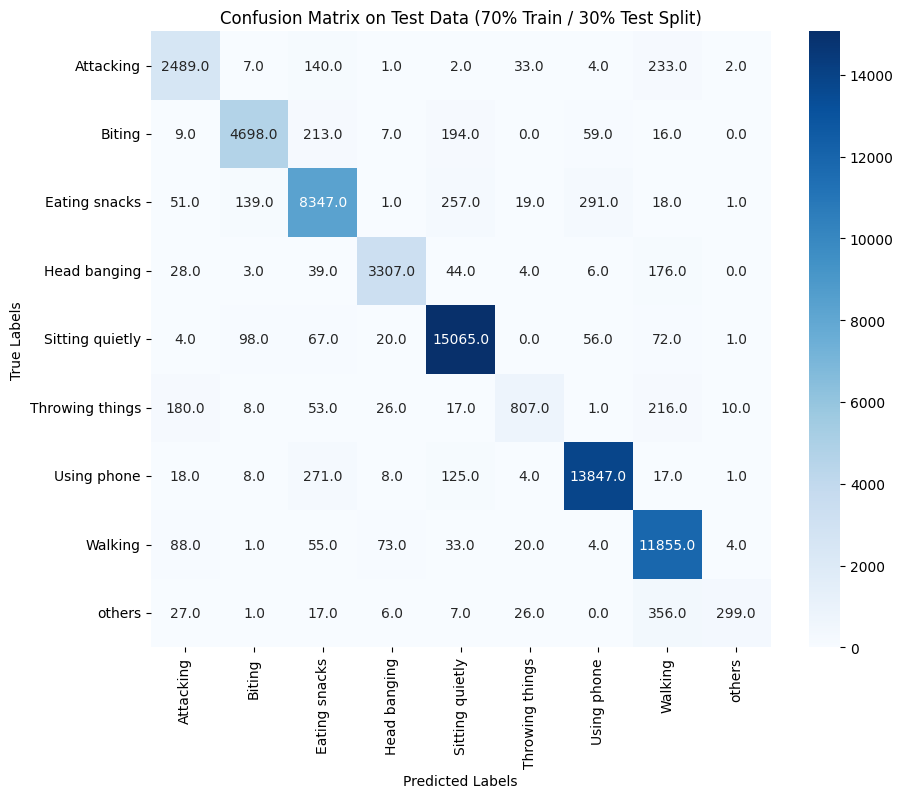

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2つのファイルを読み込み、結合する
file1 = pd.read_csv('ex/feature/features_with_labels_left_corrected.csv')
file2 = pd.read_csv('ex/feature/features_with_labels_right_corrected.csv')
combined_data = pd.concat([file1, file2], ignore_index=True)

# 特徴量とラベルを分割
X = combined_data.drop(columns=['action'])
y = combined_data['action']

# 数値データのみに変換し、NaNを処理
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]  # Xに合わせてyをフィルタリング

# データを70%をトレーニング、30%をテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの学習
model = RandomForestClassifier()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 各スコアを計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Scores:")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# テストデータの混同行列を計算して表示
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt=".1f", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on Test Data (70% Train / 30% Test Split)")
plt.savefig('test_confusion_matrix_heatmap.png')
plt.show()


randomsammpling Baseline+LLMs


Test Scores:
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


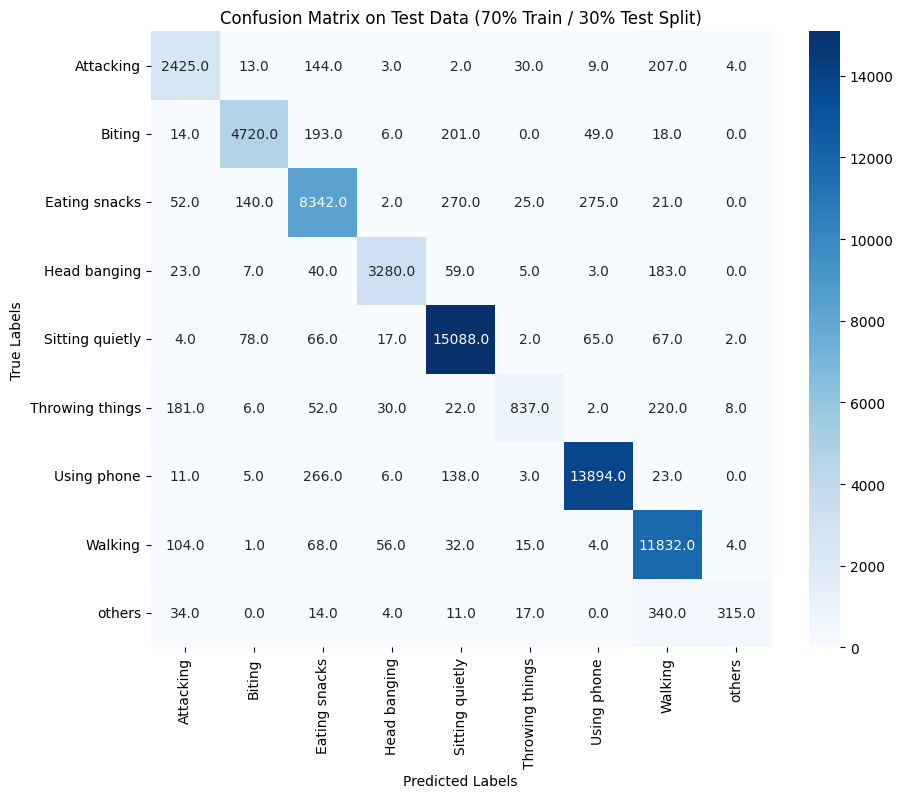

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2つのファイルを読み込み、結合する
file1 = pd.read_csv('ex/n_feature/features_with_labels_left_corrected.csv')
file2 = pd.read_csv('ex/n_feature/features_with_labels_right_corrected.csv')
combined_data = pd.concat([file1, file2], ignore_index=True)

# 特徴量とラベルを分割
X = combined_data.drop(columns=['action'])
y = combined_data['action']

# 数値データのみに変換し、NaNを処理
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]  # Xに合わせてyをフィルタリング

# データを70%をトレーニング、30%をテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# モデルの学習
model = RandomForestClassifier()
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

# 各スコアを計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Scores:")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# テストデータの混同行列を計算して表示
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)
conf_matrix_df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt=".1f", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on Test Data (70% Train / 30% Test Split)")
plt.savefig('randomsammpling Baseline+LLMs_heatmap.png')
plt.show()


#LSTM


randomsampling

Epoch 1/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.6502 - loss: 1.0141 - val_accuracy: 0.7479 - val_loss: 0.7103
Epoch 2/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7556 - loss: 0.6894 - val_accuracy: 0.7723 - val_loss: 0.6536
Epoch 3/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7752 - loss: 0.6361 - val_accuracy: 0.7827 - val_loss: 0.6171
Epoch 4/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7898 - loss: 0.6005 - val_accuracy: 0.8031 - val_loss: 0.5636
Epoch 5/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8001 - loss: 0.5677 - val_accuracy: 0.8047 - val_loss: 0.5650
Epoch 6/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8019 - loss: 0.5602 - val_accuracy: 0.8086 - val_loss: 0.5398
Epoch 7/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8111 - loss: 0.5415 - val_accuracy: 0.8190 - val_loss: 0.5217
Epoch 8/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8174 - loss: 0

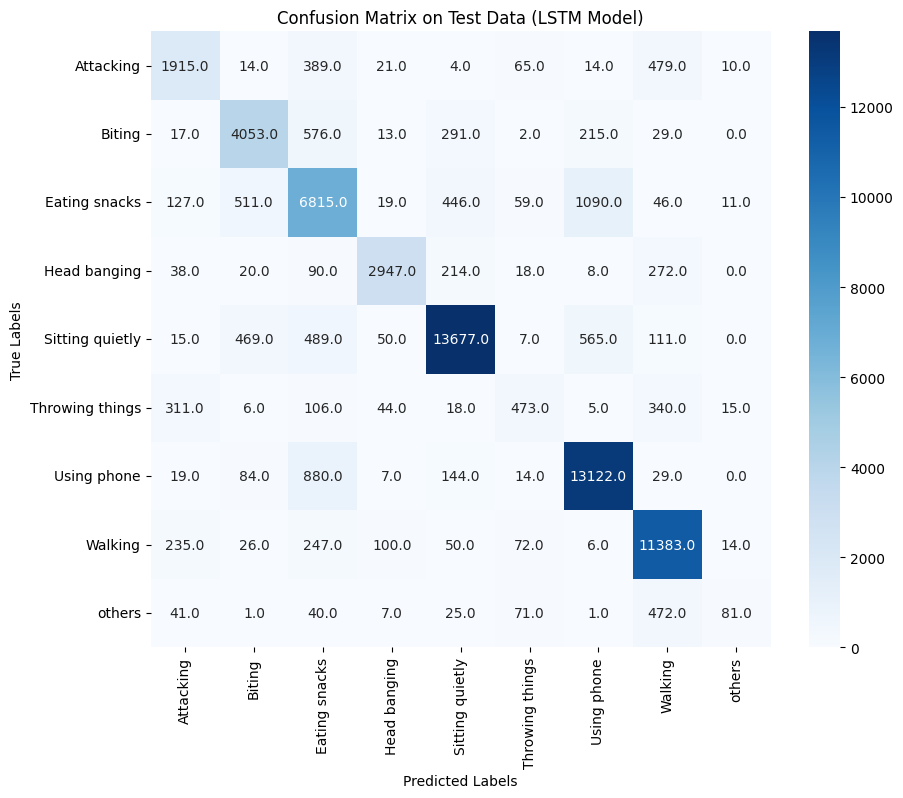

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# データを読み込み、結合
file1 = pd.read_csv('ex/feature/features_with_labels_left_corrected.csv')
file2 = pd.read_csv('ex/feature/features_with_labels_right_corrected.csv')
combined_data = pd.concat([file1, file2], ignore_index=True)

# 特徴量とラベルを分割
X = combined_data.drop(columns=['action'])
y = combined_data['action']

# 数値データに変換し、NaNを処理
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]  # Xに合わせてyをフィルタリング

# データを70%をトレーニング、30%をテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LSTM用の3次元にデータをリシェイプ（例: 1タイムステップ）
X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

# ラベルを数値にエンコード
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# LSTMモデルの構築
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルのトレーニング
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# テストデータで予測
y_test_pred = np.argmax(model.predict(X_test), axis=1)

# 各スコアを計算
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Scores:")
print(f'Accuracy: {test_accuracy:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print(f'F1 Score: {test_f1:.2f}')

# テストデータの混同行列を計算して表示
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt=".1f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on Test Data (LSTM_random Model)")
plt.savefig('lstm_randomsampling.png')
plt.show()


Baseline+LLMs



Epoch 1/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.6323 - loss: 1.0541 - val_accuracy: 0.7308 - val_loss: 0.7541
Epoch 2/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7387 - loss: 0.7345 - val_accuracy: 0.7604 - val_loss: 0.6768
Epoch 3/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7623 - loss: 0.6703 - val_accuracy: 0.7652 - val_loss: 0.6495
Epoch 4/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7755 - loss: 0.6364 - val_accuracy: 0.7847 - val_loss: 0.6208
Epoch 5/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7862 - loss: 0.6081 - val_accuracy: 0.7911 - val_loss: 0.5881
Epoch 6/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7899 - loss: 0.5936 - val_accuracy: 0.7946 - val_loss: 0.5707
Epoch 7/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.7962 - loss: 0.5731 - val_accuracy: 0.8015 - val_loss: 0.5559
Epoch 8/20
3775/3775 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8038 - loss: 0

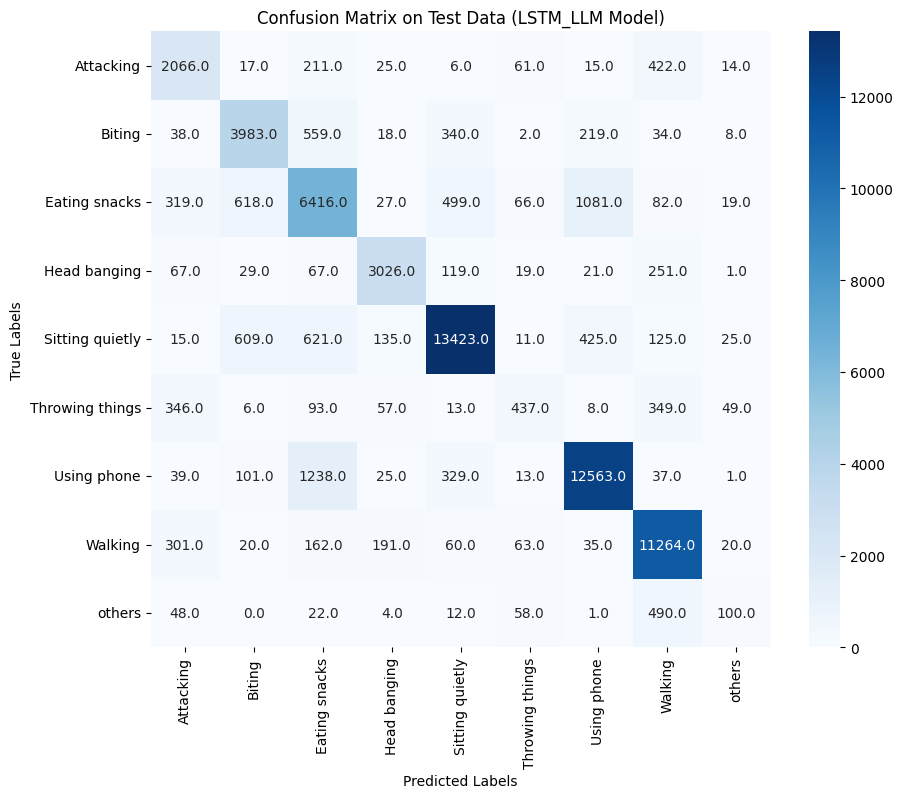

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# データを読み込み、結合
file1 = pd.read_csv('ex/n_feature/features_with_labels_left_corrected.csv')
file2 = pd.read_csv('ex/n_feature/features_with_labels_right_corrected.csv')
combined_data = pd.concat([file1, file2], ignore_index=True)

# 特徴量とラベルを分割
X = combined_data.drop(columns=['action'])
y = combined_data['action']

# 数値データに変換し、NaNを処理
X = X.apply(pd.to_numeric, errors='coerce').dropna()
y = y[X.index]  # Xに合わせてyをフィルタリング

# データを70%をトレーニング、30%をテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LSTM用の3次元にデータをリシェイプ（例: 1タイムステップ）
X_train = np.expand_dims(X_train.values, axis=1).astype(np.float32)
X_test = np.expand_dims(X_test.values, axis=1).astype(np.float32)

# ラベルを数値にエンコード
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# LSTMモデルの構築
model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# モデルのトレーニング
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# テストデータで予測
y_test_pred = np.argmax(model.predict(X_test), axis=1)

# 各スコアを計算
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Test Scores:")
print(f'Accuracy: {test_accuracy:.2f}')
print(f'Precision: {test_precision:.2f}')
print(f'Recall: {test_recall:.2f}')
print(f'F1 Score: {test_f1:.2f}')

# テストデータの混同行列を計算して表示
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt=".1f", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix on Test Data (LSTM_LLM Model)")
plt.savefig('lstm_Baseline+LLMs.png')
plt.show()
